<a href="https://colab.research.google.com/github/AnnuKharbanda/EDA-Modelling-and-Prediction/blob/main/SocialMediaTourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

# 2. Data Report

In [ ]:
df = pd.read_csv('Social+Media+Data+for+DSBA.csv')

FileNotFoundError: ignored

In [ ]:
# This the head of our data
df.head(10)

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [ ]:
df.shape

(11760, 17)

In [ ]:
df.describe().T

count          mean  \
UserID                                        11760.0  1.005880e+06   
Yearly_avg_view_on_travel_page                11179.0  2.808308e+02   
total_likes_on_outstation_checkin_given       11379.0  2.817048e+04   
Yearly_avg_comment_on_travel_page             11554.0  7.479003e+01   
total_likes_on_outofstation_checkin_received  11760.0  6.531699e+03   
week_since_last_outstation_checkin            11760.0  3.203571e+00   
montly_avg_comment_on_company_page            11760.0  2.866156e+01   
travelling_network_rating                     11760.0  2.712245e+00   
Adult_flag                                    11760.0  7.938776e-01   
Daily_Avg_mins_spend_on_traveling_page        11760.0  1.381743e+01   

                                                       std        min  \
UserID                                         3394.963917  1000001.0   
Yearly_avg_view_on_travel_page                   68.182958       35.0   
total_likes_on_outstation_checkin_given       14385.032134     3570.0   
Yearly_avg_comment_on_travel_page                24.026650        3.0   
total_likes_on_outofstation_checkin_received   4706.613785     1009.0   
week_since_last_outstation_checkin                2.616365        0.0   
montly_avg_comment_on_company_page               48.660504       11.0   
travelling_network_rating                         1.080887        1.0   
Adult_flag                                        0.851823        0.0   
Daily_Avg_mins_spend_on_traveling_page            9.070657        0.0   

                                                     25%        50%  \
UserID                                        1002940.75  1005880.5   
Yearly_avg_view_on_travel_page                    232.00      271.0   
total_likes_on_outstation_checkin_given         16380.00    28076.0   
Yearly_avg_comment_on_travel_page                  57.00       75.0   
total_likes_on_outofstation_checkin_received     2940.75     4948.0   
week_since_last_outstation_checkin                  1.00        3.0   
montly_avg_comment_on_company_page                 17.00       22.0   
travelling_network_rating                           2.00        3.0   
Adult_flag                                          0.00        1.0   
Daily_Avg_mins_spend_on_traveling_page              8.00       12.0   

                                                     75%        max  
UserID                                        1008820.25  1011760.0  
Yearly_avg_view_on_travel_page                    324.00      464.0  
total_likes_on_outstation_checkin_given         40525.00   252430.0  
Yearly_avg_comment_on_travel_page                  92.00      815.0  
total_likes_on_outofstation_checkin_received     8393.25    20065.0  
week_since_last_outstation_checkin                  5.00       11.0  
montly_avg_comment_on_company_page                 27.00      500.0  
travelling_network_rating                           4.00        4.0  
Adult_flag                                          1.00        3.0  
Daily_Avg_mins_spend_on_traveling_page             18.00      270.0

In [ ]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

# We have quite a few null values in some columns. Further we will impute these null values by using Average or median or mode for categorical and numeric variables.

In [ ]:
df.duplicated().sum()

# No duplicate values found.

0

In [ ]:
df.select_dtypes(include=['object']).dtypes

Taken_product                     object
preferred_device                  object
yearly_avg_Outstation_checkins    object
member_in_family                  object
preferred_location_type           object
following_company_page            object
working_flag                      object
dtype: object

In [ ]:
df.select_dtypes(include=['float']).dtypes

Yearly_avg_view_on_travel_page             float64
total_likes_on_outstation_checkin_given    float64
Yearly_avg_comment_on_travel_page          float64
dtype: object

In [ ]:
df.select_dtypes(include=['int64']).dtypes

UserID                                          int64
total_likes_on_outofstation_checkin_received    int64
week_since_last_outstation_checkin              int64
montly_avg_comment_on_company_page              int64
travelling_network_rating                       int64
Adult_flag                                      int64
Daily_Avg_mins_spend_on_traveling_page          int64
dtype: object

# The object dtypes need to be changed to numeric types for further analysis.

In [ ]:
df['Taken_product'].value_counts()

NameError: ignored

In [ ]:
df['preferred_device'].value_counts()

Tab                4172
iOS and Android    4134
Laptop             1108
iOS                1095
Mobile              600
Android             315
Android OS          145
ANDROID             134
Other                 2
Others                2
Name: preferred_device, dtype: int64

# We can see that Other and Others can be assumed to be the same and hence we will replace ones value with the other.

In [ ]:
df['preferred_device'].value_counts()

Tab                4172
iOS and Android    4134
Laptop             1108
iOS                1095
Mobile              600
Android             315
Android OS          145
ANDROID             134
Other                 2
Others                2
Name: preferred_device, dtype: int64

In [ ]:
df['member_in_family'].value_counts()

3        4561
4        3184
2        2256
1        1349
5         384
Three      15
10         11
Name: member_in_family, dtype: int64

Further we will replace Three with the number 3 as it is ok to assume that it is the same.

In [ ]:
df['preferred_location_type'].value_counts()

Beach              2424
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour  Travel         60
Tour and Travel      47
Game                 12
OTT                   7
Movie                 5
Name: preferred_location_type, dtype: int64

# We can see that Tour Travel and Tour and Travel can be assumed to be the same and hence we will replace ones value with the other.

In [ ]:
df['preferred_location_type'].value_counts()

Beach              2424
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour  Travel         60
Tour and Travel      47
Game                 12
OTT                   7
Movie                 5
Name: preferred_location_type, dtype: int64

In [ ]:
df['following_company_page'].value_counts()

No     8355
Yes    3285
1        12
0         5
Name: following_company_page, dtype: int64

# For the moment we will replace 0 with No and 1 with Yes for the purpose of univariate analysis. Further we will change the values vice versa for labelling.

In [ ]:
df['following_company_page'].value_counts()

No     8355
Yes    3285
1        12
0         5
Name: following_company_page, dtype: int64

In [ ]:
df['working_flag'].value_counts()

No     9952
Yes    1808
Name: working_flag, dtype: int64

In [ ]:
df['yearly_avg_Outstation_checkins'].value_counts()

1     4543
2      844
10     682
9      340
7      336
3      336
8      320
5      261
4      256
16     255
6      236
11     229
24     223
29     215
23     215
18     208
15     206
26     199
20     199
25     198
28     180
19     176
14     167
17     160
12     159
22     152
13     150
21     143
27      96
*        1
Name: yearly_avg_Outstation_checkins, dtype: int64

We can see a special character here '*' that needs to be replaced with a value¶

# **Exploratory Data Analysis**

(a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones)

Count plots of Categorical data


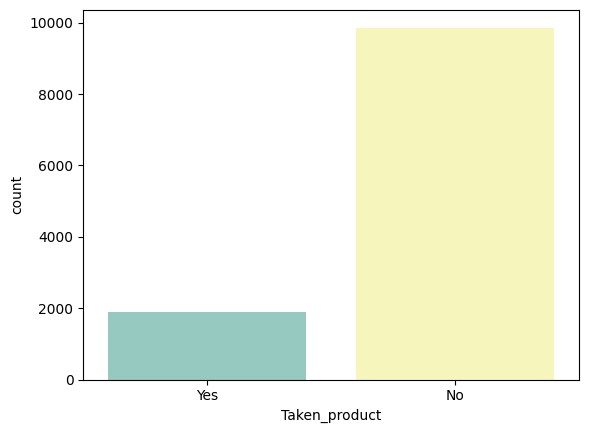

<Figure size 1000x500 with 0 Axes>

In [ ]:
sns.countplot(x='Taken_product', data=df, palette="Set3")
plt.figure(figsize = (10,5))
plt.show()

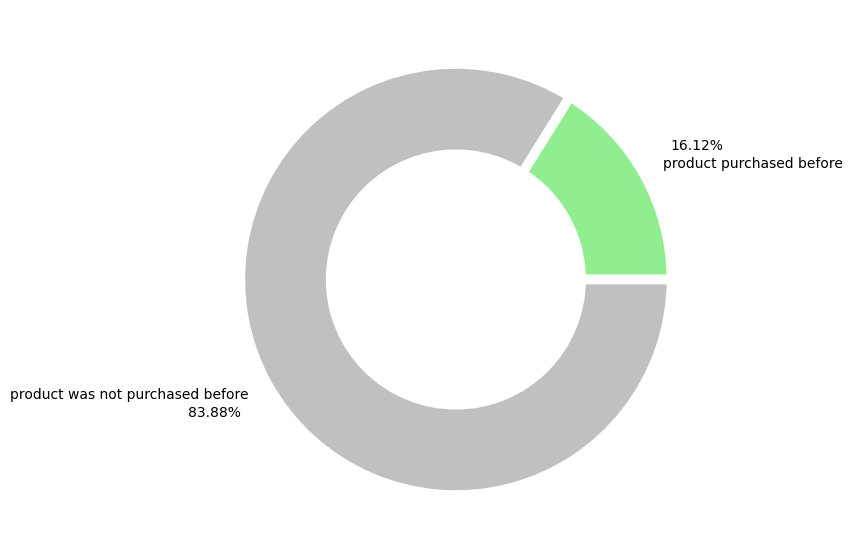

In [ ]:
product_taken= df.Taken_product.value_counts()[1]
product_not_taken = df.Taken_product.value_counts()[0]
names = ['product purchased before','product was not purchased before']
size  = [product_taken,product_not_taken]

plt.pie(size, labels=names, colors=['lightgreen','silver'],
        autopct='%.2f%%',pctdistance=1.28,
        wedgeprops={'linewidth':7, 'edgecolor':'white'})


my_circle = plt.Circle((0,0), 0.6, color='white')


fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

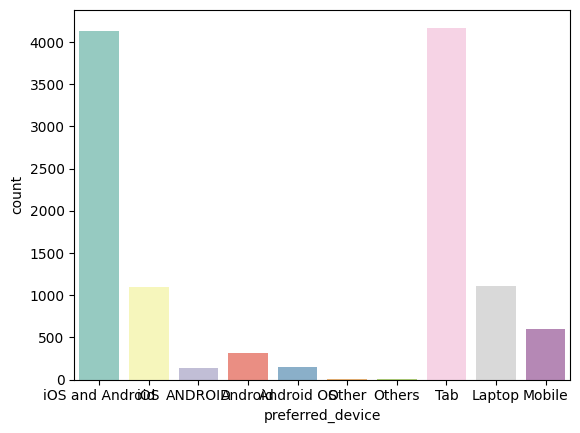

<Figure size 1000x500 with 0 Axes>

In [ ]:
sns.countplot(x=df['preferred_device'], palette="Set3")
plt.figure(figsize = (10,5))
plt.show()

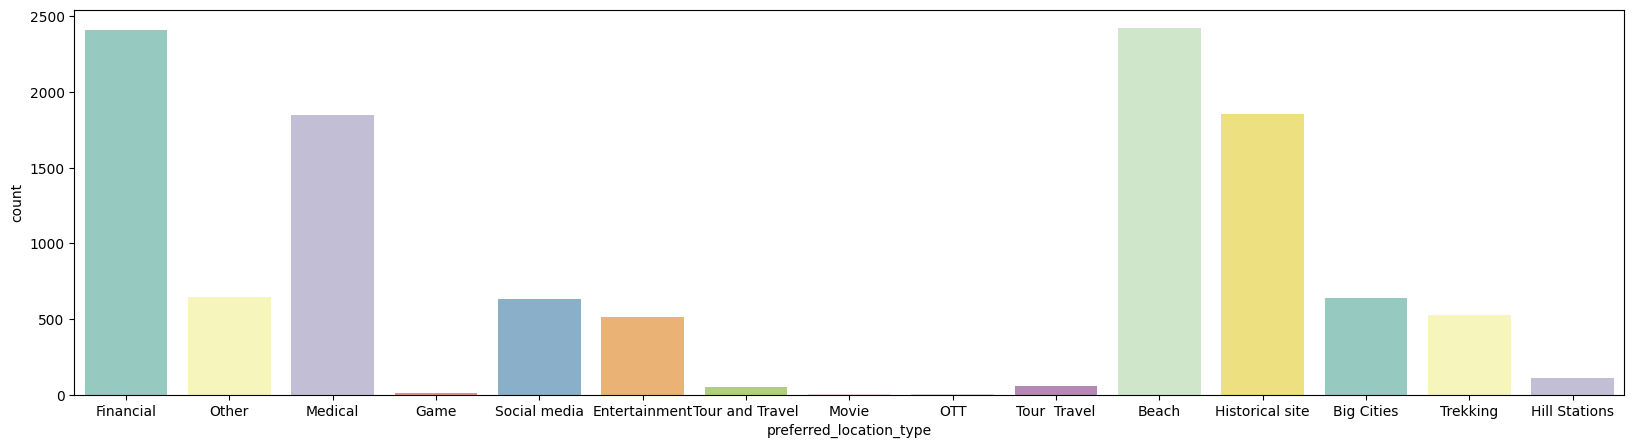

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot(x='preferred_location_type',data=df,palette="Set3")
plt.show()

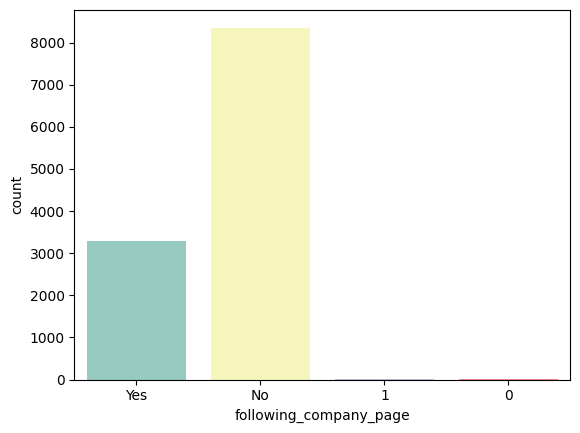

<Figure size 1000x500 with 0 Axes>

In [ ]:
sns.countplot(x=df['following_company_page'], palette="Set3")
plt.figure(figsize = (10,5))
plt.show()

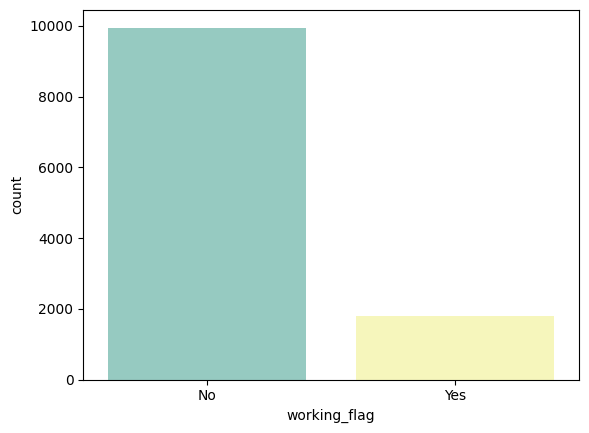

<Figure size 1000x500 with 0 Axes>

In [ ]:
sns.countplot(x=df['working_flag'], palette="Set3")
plt.figure(figsize = (10,5))
plt.show()

# Labeling Categorical data

In [ ]:
df['Taken_product']=np.where(df['Taken_product'] =='No','0', df['Taken_product'])
df['Taken_product']=np.where(df['Taken_product'] =='Yes', '1', df['Taken_product'])

Labelling people who have made a purchase with the company as '1' and people who have not made a purchase as '0'


In [ ]:
df['preferred_device']=np.where(df['preferred_device'] =='Laptop', '0', df['preferred_device'])
df['preferred_device']=np.where(df['preferred_device'] =='Android', '1', df['preferred_device'])
df['preferred_device']=np.where(df['preferred_device'] =='Android OS', '1', df['preferred_device'])
df['preferred_device']=np.where(df['preferred_device'] =='ANDROID', '1', df['preferred_device'])
df['preferred_device']=np.where(df['preferred_device'] =='Mobile', '1', df['preferred_device'])
df['preferred_device']=np.where(df['preferred_device'] =='Other', '1', df['preferred_device'])
df['preferred_device']=np.where(df['preferred_device'] =='Others', '1', df['preferred_device'])
df['preferred_device']=np.where(df['preferred_device'] =='Tab', '1', df['preferred_device'])
df['preferred_device']=np.where(df['preferred_device'] =='iOS', '1', df['preferred_device'])
df['preferred_device']=np.where(df['preferred_device'] =='iOS and Android', '1', df['preferred_device'])

Anything which is not a laptop can be considered as mobile phone usage. Labelling users who are using Laptop as '0' and people who are using anything else as '1'

In [ ]:
df['member_in_family']=np.where(df['member_in_family'] =='Three', '3', df['member_in_family'])

# Combining the family with 'Three' family members with families with '3' members.

In [ ]:
df['preferred_location_type']=np.where(df['preferred_location_type'] =='Beach', '0', df['preferred_location_type'])
df['preferred_location_type']=np.where(df['preferred_location_type'] =='Big Cities', '1', df['preferred_location_type'])
df['preferred_location_type']=np.where(df['preferred_location_type'] =='Entertainment', '2', df['preferred_location_type'])
df['preferred_location_type']=np.where(df['preferred_location_type'] =='Financial', '3', df['preferred_location_type'])
df['preferred_location_type']=np.where(df['preferred_location_type'] =='Game', '4', df['preferred_location_type'])
df['preferred_location_type']=np.where(df['preferred_location_type'] =='Hill Stations', '5', df['preferred_location_type'])
df['preferred_location_type']=np.where(df['preferred_location_type'] =='Historical site', '6', df['preferred_location_type'])
df['preferred_location_type']=np.where(df['preferred_location_type'] =='Medical', '7', df['preferred_location_type'])
df['preferred_location_type']=np.where(df['preferred_location_type'] =='Movie', '8', df['preferred_location_type'])
df['preferred_location_type']=np.where(df['preferred_location_type'] =='OTT', '9', df['preferred_location_type'])
df['preferred_location_type']=np.where(df['preferred_location_type'] =='Other', '10', df['preferred_location_type'])
df['preferred_location_type']=np.where(df['preferred_location_type'] =='Social media', '11', df['preferred_location_type'])
df['preferred_location_type']=np.where(df['preferred_location_type'] =='Tour  Travel', '12', df['preferred_location_type'])
df['preferred_location_type']=np.where(df['preferred_location_type'] =='Tour and Travel', '12', df['preferred_location_type'])
df['preferred_location_type']=np.where(df['preferred_location_type'] =='Trekking', '13', df['preferred_location_type'])

Labelling all the preferred location with unique values from '0' to '13

In [ ]:
df['following_company_page']=np.where(df['following_company_page'] =='No', '0', df['following_company_page'])
df['following_company_page']=np.where(df['following_company_page'] =='Yes', '1', df['following_company_page'])

# Labelling users who have been following the company page with '0' and users who have not been following the company page with '1'

In [ ]:
df['working_flag']=np.where(df['working_flag'] =='No', '0', df['working_flag'])
df['working_flag']=np.where(df['working_flag'] =='Yes', '1', df['working_flag'])

# Labelling users who work as '1' and users who do not work as '0'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

# We will change all the variables to numeric data type

In [ ]:
df.select_dtypes(include=['object']).dtypes

Taken_product                     object
preferred_device                  object
yearly_avg_Outstation_checkins    object
member_in_family                  object
preferred_location_type           object
following_company_page            object
working_flag                      object
dtype: object

In [ ]:
df['yearly_avg_Outstation_checkins'] = pd.to_numeric(df['yearly_avg_Outstation_checkins'], errors='coerce')
df['member_in_family'] = pd.to_numeric(df['member_in_family'], errors='coerce')
df['Taken_product'] = pd.to_numeric(df['Taken_product'], errors='coerce')
df['preferred_device'] = pd.to_numeric(df['preferred_device'], errors='coerce')
df['preferred_location_type'] = pd.to_numeric(df['preferred_location_type'], errors='coerce')
df['following_company_page'] = pd.to_numeric(df['following_company_page'], errors='coerce')
df['working_flag'] = pd.to_numeric(df['working_flag'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  int64  
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  float64
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11684 non-null  float64
 6   member_in_family                              11745 non-null  float64
 7   preferred_location_type                       11729 non-null  float64
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [ ]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   76
member_in_family                                 15
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

Imputing Null values

We will impute numeric values with median and categorical values with mode.

In [ ]:
df['Yearly_avg_view_on_travel_page'].fillna(int(df['Yearly_avg_view_on_travel_page'].median()), inplace=True)

In [ ]:
df['total_likes_on_outstation_checkin_given'].fillna(int(df['total_likes_on_outstation_checkin_given'].median()), inplace=True)

In [ ]:
df['Yearly_avg_comment_on_travel_page'].fillna(df['Yearly_avg_comment_on_travel_page'].median(), inplace=True)

In [ ]:
df['yearly_avg_Outstation_checkins'].fillna(df['yearly_avg_Outstation_checkins'].median(), inplace=True)

In [ ]:
df['preferred_device'].fillna(df['preferred_device'].mode, inplace=True)

In [ ]:
df['member_in_family'].fillna(df['member_in_family'].mode, inplace=True)

In [ ]:
df['preferred_location_type'].fillna(df['preferred_location_type'].mode, inplace=True)

In [ ]:
df['following_company_page'].fillna(df['following_company_page'].mode, inplace=True)

In [ ]:
df.shape

(11760, 17)

In [ ]:
df.isnull().sum()

UserID                                          0
Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [ ]:
df['yearly_avg_Outstation_checkins'] = pd.to_numeric(df['yearly_avg_Outstation_checkins'], errors='coerce')
df['member_in_family'] = pd.to_numeric(df['member_in_family'], errors='coerce')
df['Taken_product'] = pd.to_numeric(df['Taken_product'], errors='coerce')
df['preferred_device'] = pd.to_numeric(df['preferred_device'], errors='coerce')
df['preferred_location_type'] = pd.to_numeric(df['preferred_location_type'], errors='coerce')
df['following_company_page'] = pd.to_numeric(df['following_company_page'], errors='coerce')
df['working_flag'] = pd.to_numeric(df['working_flag'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  int64  
 2   Yearly_avg_view_on_travel_page                11760 non-null  float64
 3   preferred_device                              11707 non-null  float64
 4   total_likes_on_outstation_checkin_given       11760 non-null  float64
 5   yearly_avg_Outstation_checkins                11760 non-null  float64
 6   member_in_family                              11745 non-null  float64
 7   preferred_location_type                       11729 non-null  float64
 8   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [ ]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                    0
preferred_device                                 53
total_likes_on_outstation_checkin_given           0
yearly_avg_Outstation_checkins                    0
member_in_family                                 15
preferred_location_type                          31
Yearly_avg_comment_on_travel_page                 0
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [ ]:
df['preferred_device'].isnull().sum()

53

In [ ]:
df['preferred_device'].fillna(df['preferred_device'].mode, inplace=True)

In [ ]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                    0
preferred_device                                  0
total_likes_on_outstation_checkin_given           0
yearly_avg_Outstation_checkins                    0
member_in_family                                 15
preferred_location_type                          31
Yearly_avg_comment_on_travel_page                 0
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imp_cat = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df["preferred_location_type"] =  imputer.fit_transform(df[["preferred_location_type"]])
df['preferred_location_type'].isnull().sum()

0

In [ ]:
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df["following_company_page"] =  imputer.fit_transform(df[["following_company_page"]])
df['following_company_page'].isnull().sum()

0

In [ ]:
df['preferred_device'] = pd.to_numeric(df['preferred_device'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  int64  
 2   Yearly_avg_view_on_travel_page                11760 non-null  float64
 3   preferred_device                              11707 non-null  float64
 4   total_likes_on_outstation_checkin_given       11760 non-null  float64
 5   yearly_avg_Outstation_checkins                11760 non-null  float64
 6   member_in_family                              11745 non-null  float64
 7   preferred_location_type                       11760 non-null  float64
 8   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [ ]:
df.isnull().sum()

UserID                                           0
Taken_product                                    0
Yearly_avg_view_on_travel_page                   0
preferred_device                                53
total_likes_on_outstation_checkin_given          0
yearly_avg_Outstation_checkins                   0
member_in_family                                15
preferred_location_type                          0
Yearly_avg_comment_on_travel_page                0
total_likes_on_outofstation_checkin_received     0
week_since_last_outstation_checkin               0
following_company_page                           0
montly_avg_comment_on_company_page               0
working_flag                                     0
travelling_network_rating                        0
Adult_flag                                       0
Daily_Avg_mins_spend_on_traveling_page           0
dtype: int64

In [ ]:
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df["preferred_device"] =  imputer.fit_transform(df[["preferred_device"]])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  int64  
 2   Yearly_avg_view_on_travel_page                11760 non-null  float64
 3   preferred_device                              11760 non-null  float64
 4   total_likes_on_outstation_checkin_given       11760 non-null  float64
 5   yearly_avg_Outstation_checkins                11760 non-null  float64
 6   member_in_family                              11745 non-null  float64
 7   preferred_location_type                       11760 non-null  float64
 8   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [ ]:
df.isnull().sum()

UserID                                           0
Taken_product                                    0
Yearly_avg_view_on_travel_page                   0
preferred_device                                 0
total_likes_on_outstation_checkin_given          0
yearly_avg_Outstation_checkins                   0
member_in_family                                15
preferred_location_type                          0
Yearly_avg_comment_on_travel_page                0
total_likes_on_outofstation_checkin_received     0
week_since_last_outstation_checkin               0
following_company_page                           0
montly_avg_comment_on_company_page               0
working_flag                                     0
travelling_network_rating                        0
Adult_flag                                       0
Daily_Avg_mins_spend_on_traveling_page           0
dtype: int64

In [ ]:
df.skew()

UserID                                          0.000000
Taken_product                                   1.842719
Yearly_avg_view_on_travel_page                  0.446136
preferred_device                               -2.778436
total_likes_on_outstation_checkin_given         0.498413
yearly_avg_Outstation_checkins                  0.977806
member_in_family                                0.001491
preferred_location_type                         0.486200
Yearly_avg_comment_on_travel_page               4.910947
total_likes_on_outofstation_checkin_received    1.368578
week_since_last_outstation_checkin              0.915334
following_company_page                          0.978111
montly_avg_comment_on_company_page              7.684150
working_flag                                    1.920166
travelling_network_rating                      -0.302557
Adult_flag                                      0.968115
Daily_Avg_mins_spend_on_traveling_page          4.480682
dtype: float64

In [ ]:
df.head()

UserID  Taken_product  Yearly_avg_view_on_travel_page  preferred_device  \
0  1000001              1                           307.0               1.0   
1  1000002              0                           367.0               1.0   
2  1000003              1                           277.0               1.0   
3  1000004              0                           247.0               1.0   
4  1000005              0                           202.0               1.0   

   total_likes_on_outstation_checkin_given  yearly_avg_Outstation_checkins  \
0                                  38570.0                             1.0   
1                                   9765.0                             1.0   
2                                  48055.0                             1.0   
3                                  48720.0                             1.0   
4                                  20685.0                             1.0   

   member_in_family  preferred_location_type  \
0               2.0                      3.0   
1               1.0                      3.0   
2               2.0                     10.0   
3               4.0                      3.0   
4               1.0                      7.0   

   Yearly_avg_comment_on_travel_page  \
0                               94.0   
1                               61.0   
2                               92.0   
3                               56.0   
4                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin  following_company_page  \
0                                   8                     1.0   
1                                   1                     0.0   
2                                   6                     1.0   
3                                   1                     1.0   
4                                   9                     0.0   

   montly_avg_comment_on_company_page  working_flag  \
0                                  11             0   
1                                  23             1   
2                                  15             0   
3                                  11             0   
4                                  12             0   

   travelling_network_rating  Adult_flag  \
0                          1           0   
1                          4           1   
2                          2           0   
3                          3           0   
4                          4           1   

   Daily_Avg_mins_spend_on_traveling_page  
0                                       8  
1                                      10  
2                                       7  
3                                       8  
4                                       6

In [ ]:
df.drop(['UserID'], axis=1, inplace = True)

In [ ]:
df.head()

Taken_product  Yearly_avg_view_on_travel_page  preferred_device  \
0              1                           307.0               1.0   
1              0                           367.0               1.0   
2              1                           277.0               1.0   
3              0                           247.0               1.0   
4              0                           202.0               1.0   

   total_likes_on_outstation_checkin_given  yearly_avg_Outstation_checkins  \
0                                  38570.0                             1.0   
1                                   9765.0                             1.0   
2                                  48055.0                             1.0   
3                                  48720.0                             1.0   
4                                  20685.0                             1.0   

   member_in_family  preferred_location_type  \
0               2.0                      3.0   
1               1.0                      3.0   
2               2.0                     10.0   
3               4.0                      3.0   
4               1.0                      7.0   

   Yearly_avg_comment_on_travel_page  \
0                               94.0   
1                               61.0   
2                               92.0   
3                               56.0   
4                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin  following_company_page  \
0                                   8                     1.0   
1                                   1                     0.0   
2                                   6                     1.0   
3                                   1                     1.0   
4                                   9                     0.0   

   montly_avg_comment_on_company_page  working_flag  \
0                                  11             0   
1                                  23             1   
2                                  15             0   
3                                  11             0   
4                                  12             0   

   travelling_network_rating  Adult_flag  \
0                          1           0   
1                          4           1   
2                          2           0   
3                          3           0   
4                          4           1   

   Daily_Avg_mins_spend_on_traveling_page  
0                                       8  
1                                      10  
2                                       7  
3                                       8  
4                                       6

Splitting the data frame

In [ ]:
df1_laptop = df[df['preferred_device'] <= 0]

In [ ]:
df1_laptop.head()

Taken_product  Yearly_avg_view_on_travel_page  preferred_device  \
5881              0                           379.0               0.0   
5883              0                           255.0               0.0   
5885              0                           250.0               0.0   
5888              0                           295.0               0.0   
5906              1                           250.0               0.0   

      total_likes_on_outstation_checkin_given  yearly_avg_Outstation_checkins  \
5881                                   9776.0                             8.0   
5883                                  48725.0                             3.0   
5885                                  35184.0                             2.0   
5888                                   7572.0                            23.0   
5906                                  39379.0                            16.0   

      member_in_family  preferred_location_type  \
5881               1.0                      0.0   
5883               4.0                      0.0   
5885               2.0                      0.0   
5888               3.0                      0.0   
5906               1.0                      0.0   

      Yearly_avg_comment_on_travel_page  \
5881                               64.0   
5883                               59.0   
5885                               84.0   
5888                               48.0   
5906                               80.0   

      total_likes_on_outofstation_checkin_received  \
5881                                          5142   
5883                                          2913   
5885                                          3074   
5888                                          9532   
5906                                          3926   

      week_since_last_outstation_checkin  following_company_page  \
5881                                   1                     0.0   
5883                                   1                     1.0   
5885                                   0                     0.0   
5888                                   0                     0.0   
5906                                   1                     1.0   

      montly_avg_comment_on_company_page  working_flag  \
5881                                  33             1   
5883                                  19             0   
5885                                  23             0   
5888                                  33             1   
5906                                  33             1   

      travelling_network_rating  Adult_flag  \
5881                          4           1   
5883                          3           0   
5885                          3           0   
5888                          2           0   
5906                          2           0   

      Daily_Avg_mins_spend_on_traveling_page  
5881                                      10  
5883                                       8  
5885                                       8  
5888                                      10  
5906                                      10

In [ ]:
df2_mobile = df[df['preferred_device'] >= 1]

In [ ]:
df2_mobile.head()

Taken_product  Yearly_avg_view_on_travel_page  preferred_device  \
0              1                           307.0               1.0   
1              0                           367.0               1.0   
2              1                           277.0               1.0   
3              0                           247.0               1.0   
4              0                           202.0               1.0   

   total_likes_on_outstation_checkin_given  yearly_avg_Outstation_checkins  \
0                                  38570.0                             1.0   
1                                   9765.0                             1.0   
2                                  48055.0                             1.0   
3                                  48720.0                             1.0   
4                                  20685.0                             1.0   

   member_in_family  preferred_location_type  \
0               2.0                      3.0   
1               1.0                      3.0   
2               2.0                     10.0   
3               4.0                      3.0   
4               1.0                      7.0   

   Yearly_avg_comment_on_travel_page  \
0                               94.0   
1                               61.0   
2                               92.0   
3                               56.0   
4                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin  following_company_page  \
0                                   8                     1.0   
1                                   1                     0.0   
2                                   6                     1.0   
3                                   1                     1.0   
4                                   9                     0.0   

   montly_avg_comment_on_company_page  working_flag  \
0                                  11             0   
1                                  23             1   
2                                  15             0   
3                                  11             0   
4                                  12             0   

   travelling_network_rating  Adult_flag  \
0                          1           0   
1                          4           1   
2                          2           0   
3                          3           0   
4                          4           1   

   Daily_Avg_mins_spend_on_traveling_page  
0                                       8  
1                                      10  
2                                       7  
3                                       8  
4                                       6

In [ ]:
df1_laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 5881 to 11758
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 1108 non-null   int64  
 1   Yearly_avg_view_on_travel_page                1108 non-null   float64
 2   preferred_device                              1108 non-null   float64
 3   total_likes_on_outstation_checkin_given       1108 non-null   float64
 4   yearly_avg_Outstation_checkins                1108 non-null   float64
 5   member_in_family                              1108 non-null   float64
 6   preferred_location_type                       1108 non-null   float64
 7   Yearly_avg_comment_on_travel_page             1108 non-null   float64
 8   total_likes_on_outofstation_checkin_received  1108 non-null   int64  
 9   week_since_last_outstation_checkin            1108 non-null

Feature selection using RFE


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x= df.drop('Taken_product', axis=1)
y= df['Taken_product']

# RFE with decision tree

In [ ]:
rfe = RFE (estimator= DecisionTreeClassifier(), n_features_to_select=10)
rfe.fit(x,y)

ValueError: ignored

In [ ]:
for i, col in zip(range(x.shape[1]), x.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

AttributeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,train_size=0.70, random_state=1)
select = RFE(DecisionTreeClassifier(random_state=1), n_features_to_select=10)
select.fit(x_train, y_train)
x_train_selected = select.transform(x_train)

print("x_train.shape: {}".format(x_train.shape))
print("x_train_selected.shape: {}".format(x_train_selected.shape))


ValueError: ignored

In [ ]:
x_test_selected = select.transform(x_test)

rfe.fit(x_train, y_train)
print ('Score with all features: {:,.3f}'.format(rfe.score(x_test,y_test)))

rfe.fit(x_train_selected, y_train)
print ('Score with selected features: {:,.3f}'.format(rfe.score(x_test_selected,y_test)))

ValueError: ignored

# RFE with Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rfe = RFE (estimator= RandomForestClassifier(), n_features_to_select=10)
rfe.fit(x,y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

In [ ]:
for i, col in zip(range(x.shape[1]), x.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

Yearly_avg_view_on_travel_page selected=True rank=1
preferred_device selected=False rank=6
total_likes_on_outstation_checkin_given selected=True rank=1
yearly_avg_Outstation_checkins selected=True rank=1
member_in_family selected=True rank=1
preferred_location_type selected=False rank=3
Yearly_avg_comment_on_travel_page selected=True rank=1
total_likes_on_outofstation_checkin_received selected=True rank=1
week_since_last_outstation_checkin selected=True rank=1
following_company_page selected=True rank=1
montly_avg_comment_on_company_page selected=False rank=4
working_flag selected=False rank=5
travelling_network_rating selected=False rank=2
Adult_flag selected=True rank=1
Daily_Avg_mins_spend_on_traveling_page selected=True rank=1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,train_size=0.70, random_state=1)
select = RFE(RandomForestClassifier(n_estimators=50, random_state=1), n_features_to_select=10)
select.fit(x_train, y_train)
x_train_selected = select.transform(x_train)

print("x_train.shape: {}".format(x_train.shape))
print("x_train_selected.shape: {}".format(x_train_selected.shape))

x_train.shape: (8232, 15)
x_train_selected.shape: (8232, 10)


In [ ]:
x_test_selected = select.transform(x_test)

rfe.fit(x_train, y_train)
print ('Score with all features: {:,.3f}'.format(rfe.score(x_test,y_test)))

rfe.fit(x_train_selected, y_train)
print ('Score with selected features: {:,.3f}'.format(rfe.score(x_test_selected,y_test)))

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  int64  
 1   Yearly_avg_view_on_travel_page                11760 non-null  float64
 2   preferred_device                              11760 non-null  float64
 3   total_likes_on_outstation_checkin_given       11760 non-null  float64
 4   yearly_avg_Outstation_checkins                11760 non-null  float64
 5   member_in_family                              11760 non-null  int64  
 6   preferred_location_type                       11760 non-null  float64
 7   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

<Axes: ylabel='Frequency'>

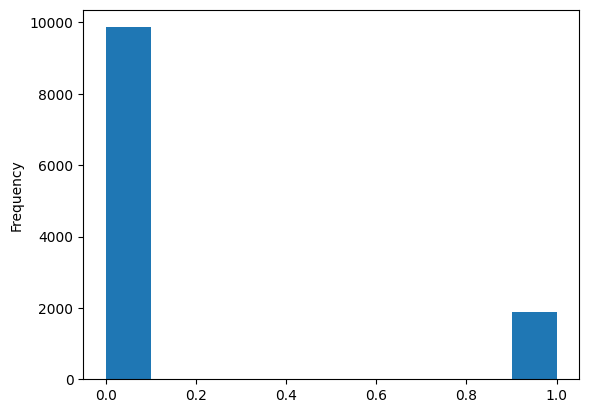

In [ ]:
df['Taken_product'].plot.hist()

<Axes: ylabel='Frequency'>

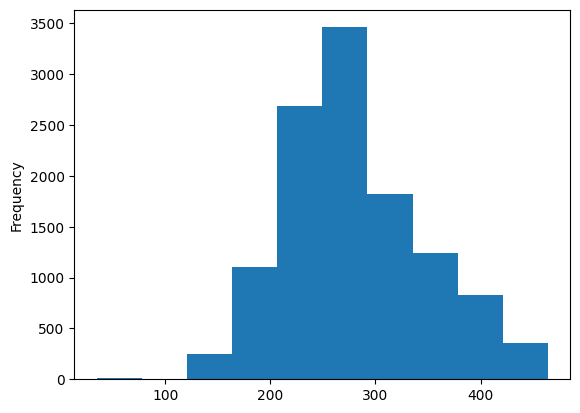

In [ ]:
df['Yearly_avg_view_on_travel_page'].plot.hist()

<Axes: ylabel='Frequency'>

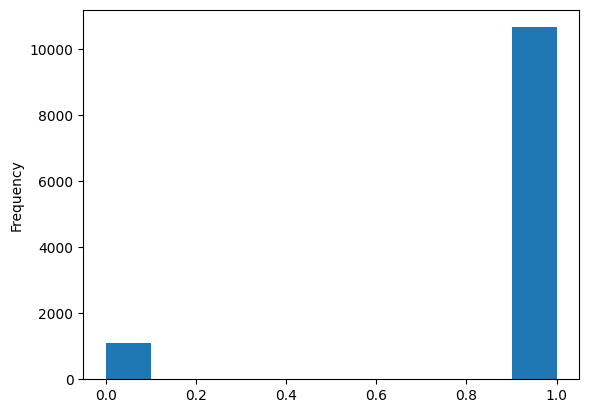

In [ ]:
df['preferred_device'].plot.hist()

# Bivariate Analysis

In [ ]:
sns.set()
sns.set_palette(palette='tab10')

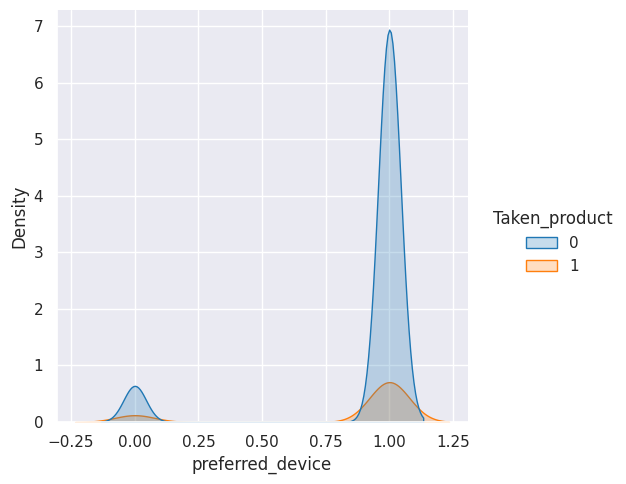

In [ ]:
sns.displot(df, x="preferred_device", kind="kde", hue = "Taken_product" , fill = True)
plt.show()

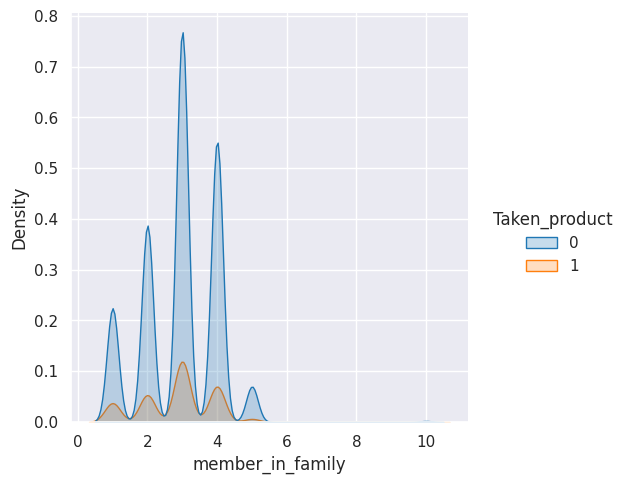

In [ ]:
sns.displot(df, x="member_in_family", kind='kde', hue = "Taken_product" , fill = True)
plt.show()

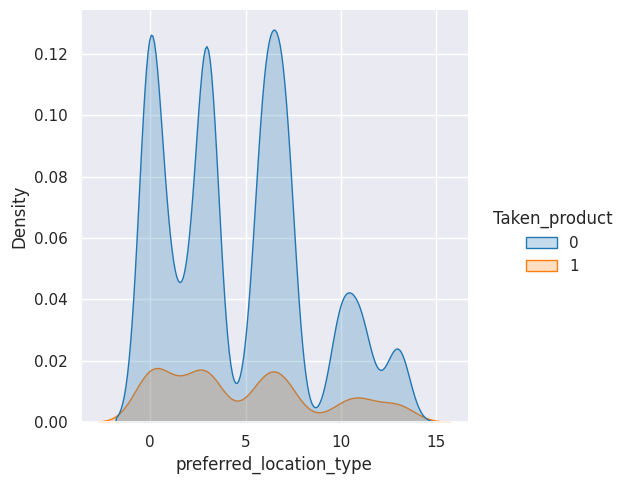

In [ ]:
sns.displot(df, x="preferred_location_type", kind='kde', hue = "Taken_product" , fill = True)
plt.show()

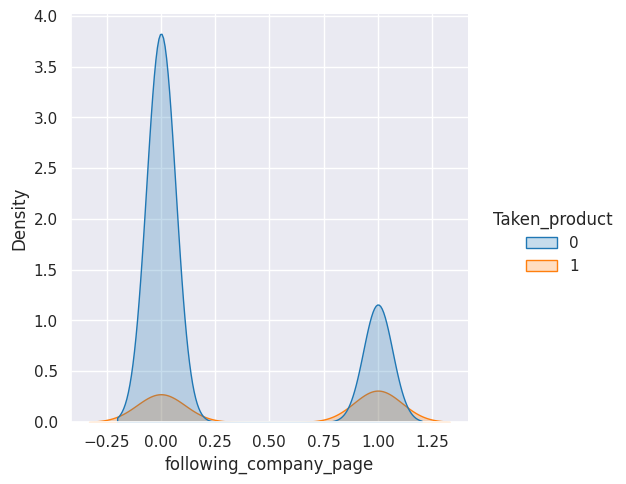

In [ ]:
sns.displot(df, x="following_company_page", kind='kde', hue = "Taken_product" , fill = True)
plt.show()

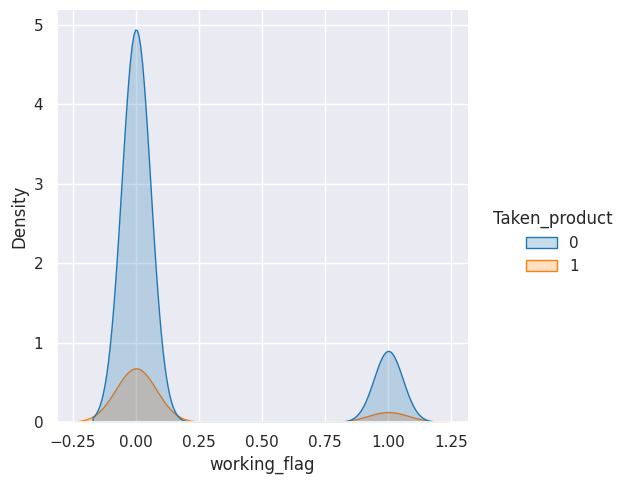

In [ ]:
sns.displot(df, x="working_flag", kind='kde', hue = "Taken_product" , fill = True)
plt.show()

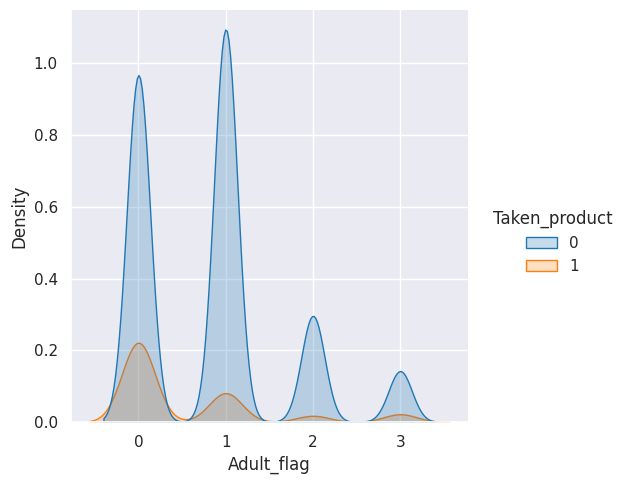

In [ ]:
sns.displot(df, x="Adult_flag", kind='kde', hue = "Taken_product" , fill = True)
plt.show()

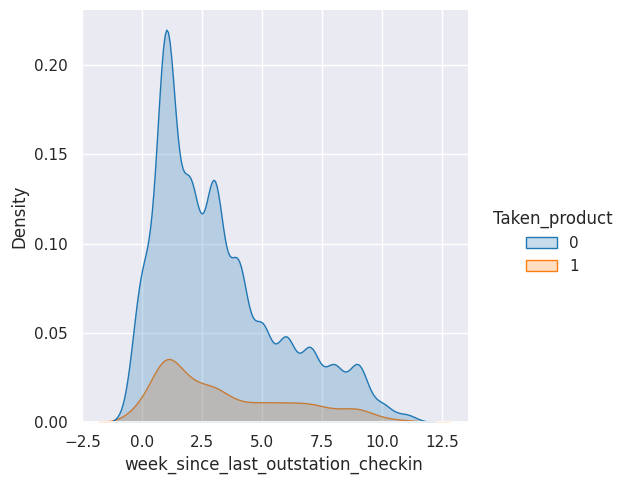

In [ ]:
sns.displot(df, x="week_since_last_outstation_checkin", kind='kde', hue = "Taken_product" , fill = True)
plt.show()

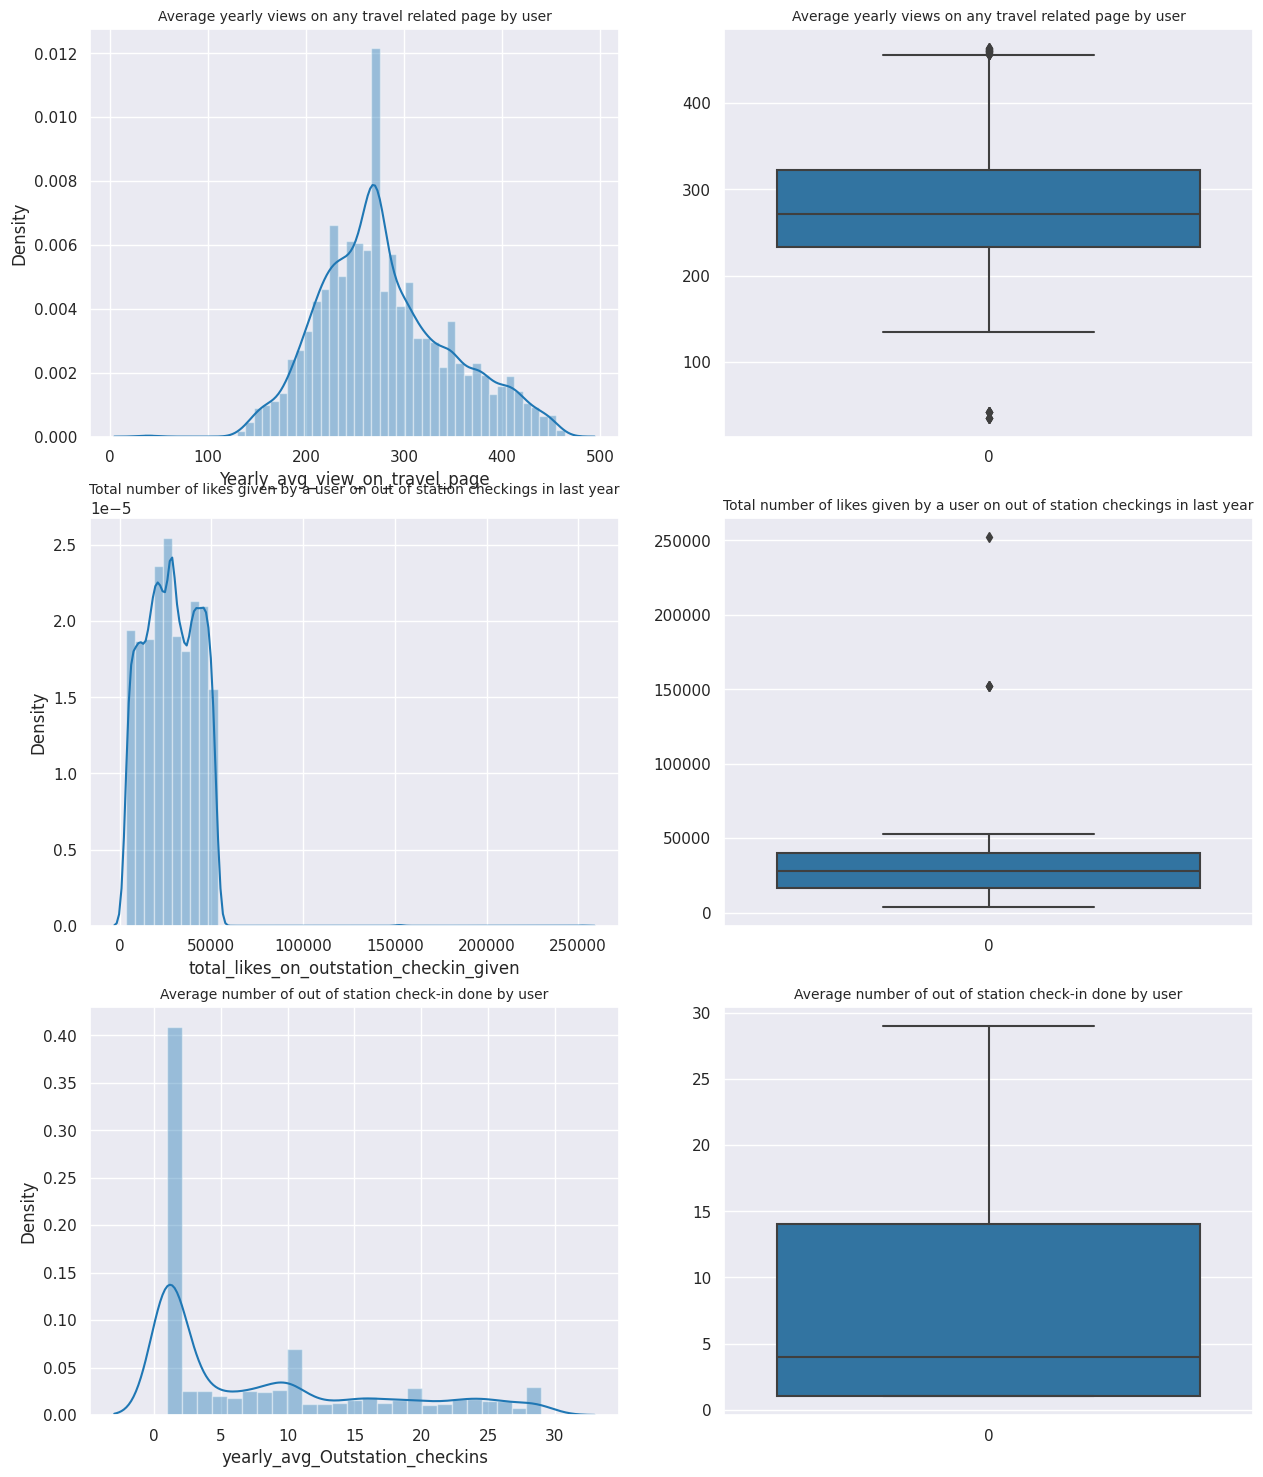

In [ ]:
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 18)

a = sns.distplot(df['Yearly_avg_view_on_travel_page'] , ax=axes[0][0])
a.set_title("Average yearly views on any travel related page by user",fontsize=10)
a = sns.boxplot(df['Yearly_avg_view_on_travel_page'] , orient = "v" , ax=axes[0][1])
a.set_title("Average yearly views on any travel related page by user",fontsize=10)
a = sns.distplot(df['total_likes_on_outstation_checkin_given'] , ax=axes[1][0])
a.set_title("Total number of likes given by a user on out of station checkings in last year",fontsize=10)
a = sns.boxplot(df['total_likes_on_outstation_checkin_given'] , orient = "v" , ax=axes[1][1])
a.set_title("Total number of likes given by a user on out of station checkings in last year",fontsize=10)
a = sns.distplot(df['yearly_avg_Outstation_checkins'] , ax=axes[2][0])
a.set_title("Average number of out of station check-in done by user",fontsize=10)
a = sns.boxplot(df['yearly_avg_Outstation_checkins'] , orient = "v" , ax=axes[2][1])
a.set_title("Average number of out of station check-in done by user",fontsize=10)
plt.show()

# Multivariate Analysis

In [ ]:
corr = df.corr(method='pearson')
df.corr()

Taken_product  \
Taken_product                                      1.000000   
Yearly_avg_view_on_travel_page                    -0.149868   
preferred_device                                  -0.077068   
total_likes_on_outstation_checkin_given           -0.054193   
yearly_avg_Outstation_checkins                     0.075805   
member_in_family                                  -0.032282   
preferred_location_type                            0.025088   
Yearly_avg_comment_on_travel_page                 -0.005465   
total_likes_on_outofstation_checkin_received      -0.159824   
week_since_last_outstation_checkin                 0.044725   
following_company_page                             0.244244   
montly_avg_comment_on_company_page                 0.000611   
working_flag                                       0.002889   
travelling_network_rating                         -0.045872   
Adult_flag                                        -0.137145   
Daily_Avg_mins_spend_on_traveling_page            -0.143220   

                                              Yearly_avg_view_on_travel_page  \
Taken_product                                                      -0.149868   
Yearly_avg_view_on_travel_page                                      1.000000   
preferred_device                                                   -0.008659   
total_likes_on_outstation_checkin_given                             0.010511   
yearly_avg_Outstation_checkins                                      0.008728   
member_in_family                                                    0.191293   
preferred_location_type                                            -0.042619   
Yearly_avg_comment_on_travel_page                                   0.041777   
total_likes_on_outofstation_checkin_received                        0.484846   
week_since_last_outstation_checkin                                  0.278970   
following_company_page                                              0.029816   
montly_avg_comment_on_company_page                                 -0.009498   
working_flag                                                        0.005257   
travelling_network_rating                                           0.056211   
Adult_flag                                                          0.036837   
Daily_Avg_mins_spend_on_traveling_page                              0.580170   

                                              preferred_device  \
Taken_product                                        -0.077068   
Yearly_avg_view_on_travel_page                       -0.008659   
preferred_device                                      1.000000   
total_likes_on_outstation_checkin_given               0.009066   
yearly_avg_Outstation_checkins                       -0.040330   
member_in_family                                      0.008037   
preferred_location_type                               0.095496   
Yearly_avg_comment_on_travel_page                    -0.036603   
total_likes_on_outofstation_checkin_received          0.020927   
week_since_last_outstation_checkin                    0.025318   
following_company_page                               -0.021621   
montly_avg_comment_on_company_page                    0.014997   
working_flag                                         -0.011019   
travelling_network_rating                            -0.019076   
Adult_flag                                            0.010804   
Daily_Avg_mins_spend_on_traveling_page                0.006826   

                                              total_likes_on_outstation_checkin_given  \
Taken_product                                                               -0.054193   
Yearly_avg_view_on_travel_page                                               0.010511   
preferred_device                                                             0.009066   
total_likes_on_outstation_checkin_given                                      1.000000   
yearly_avg_Outstation_checkins               

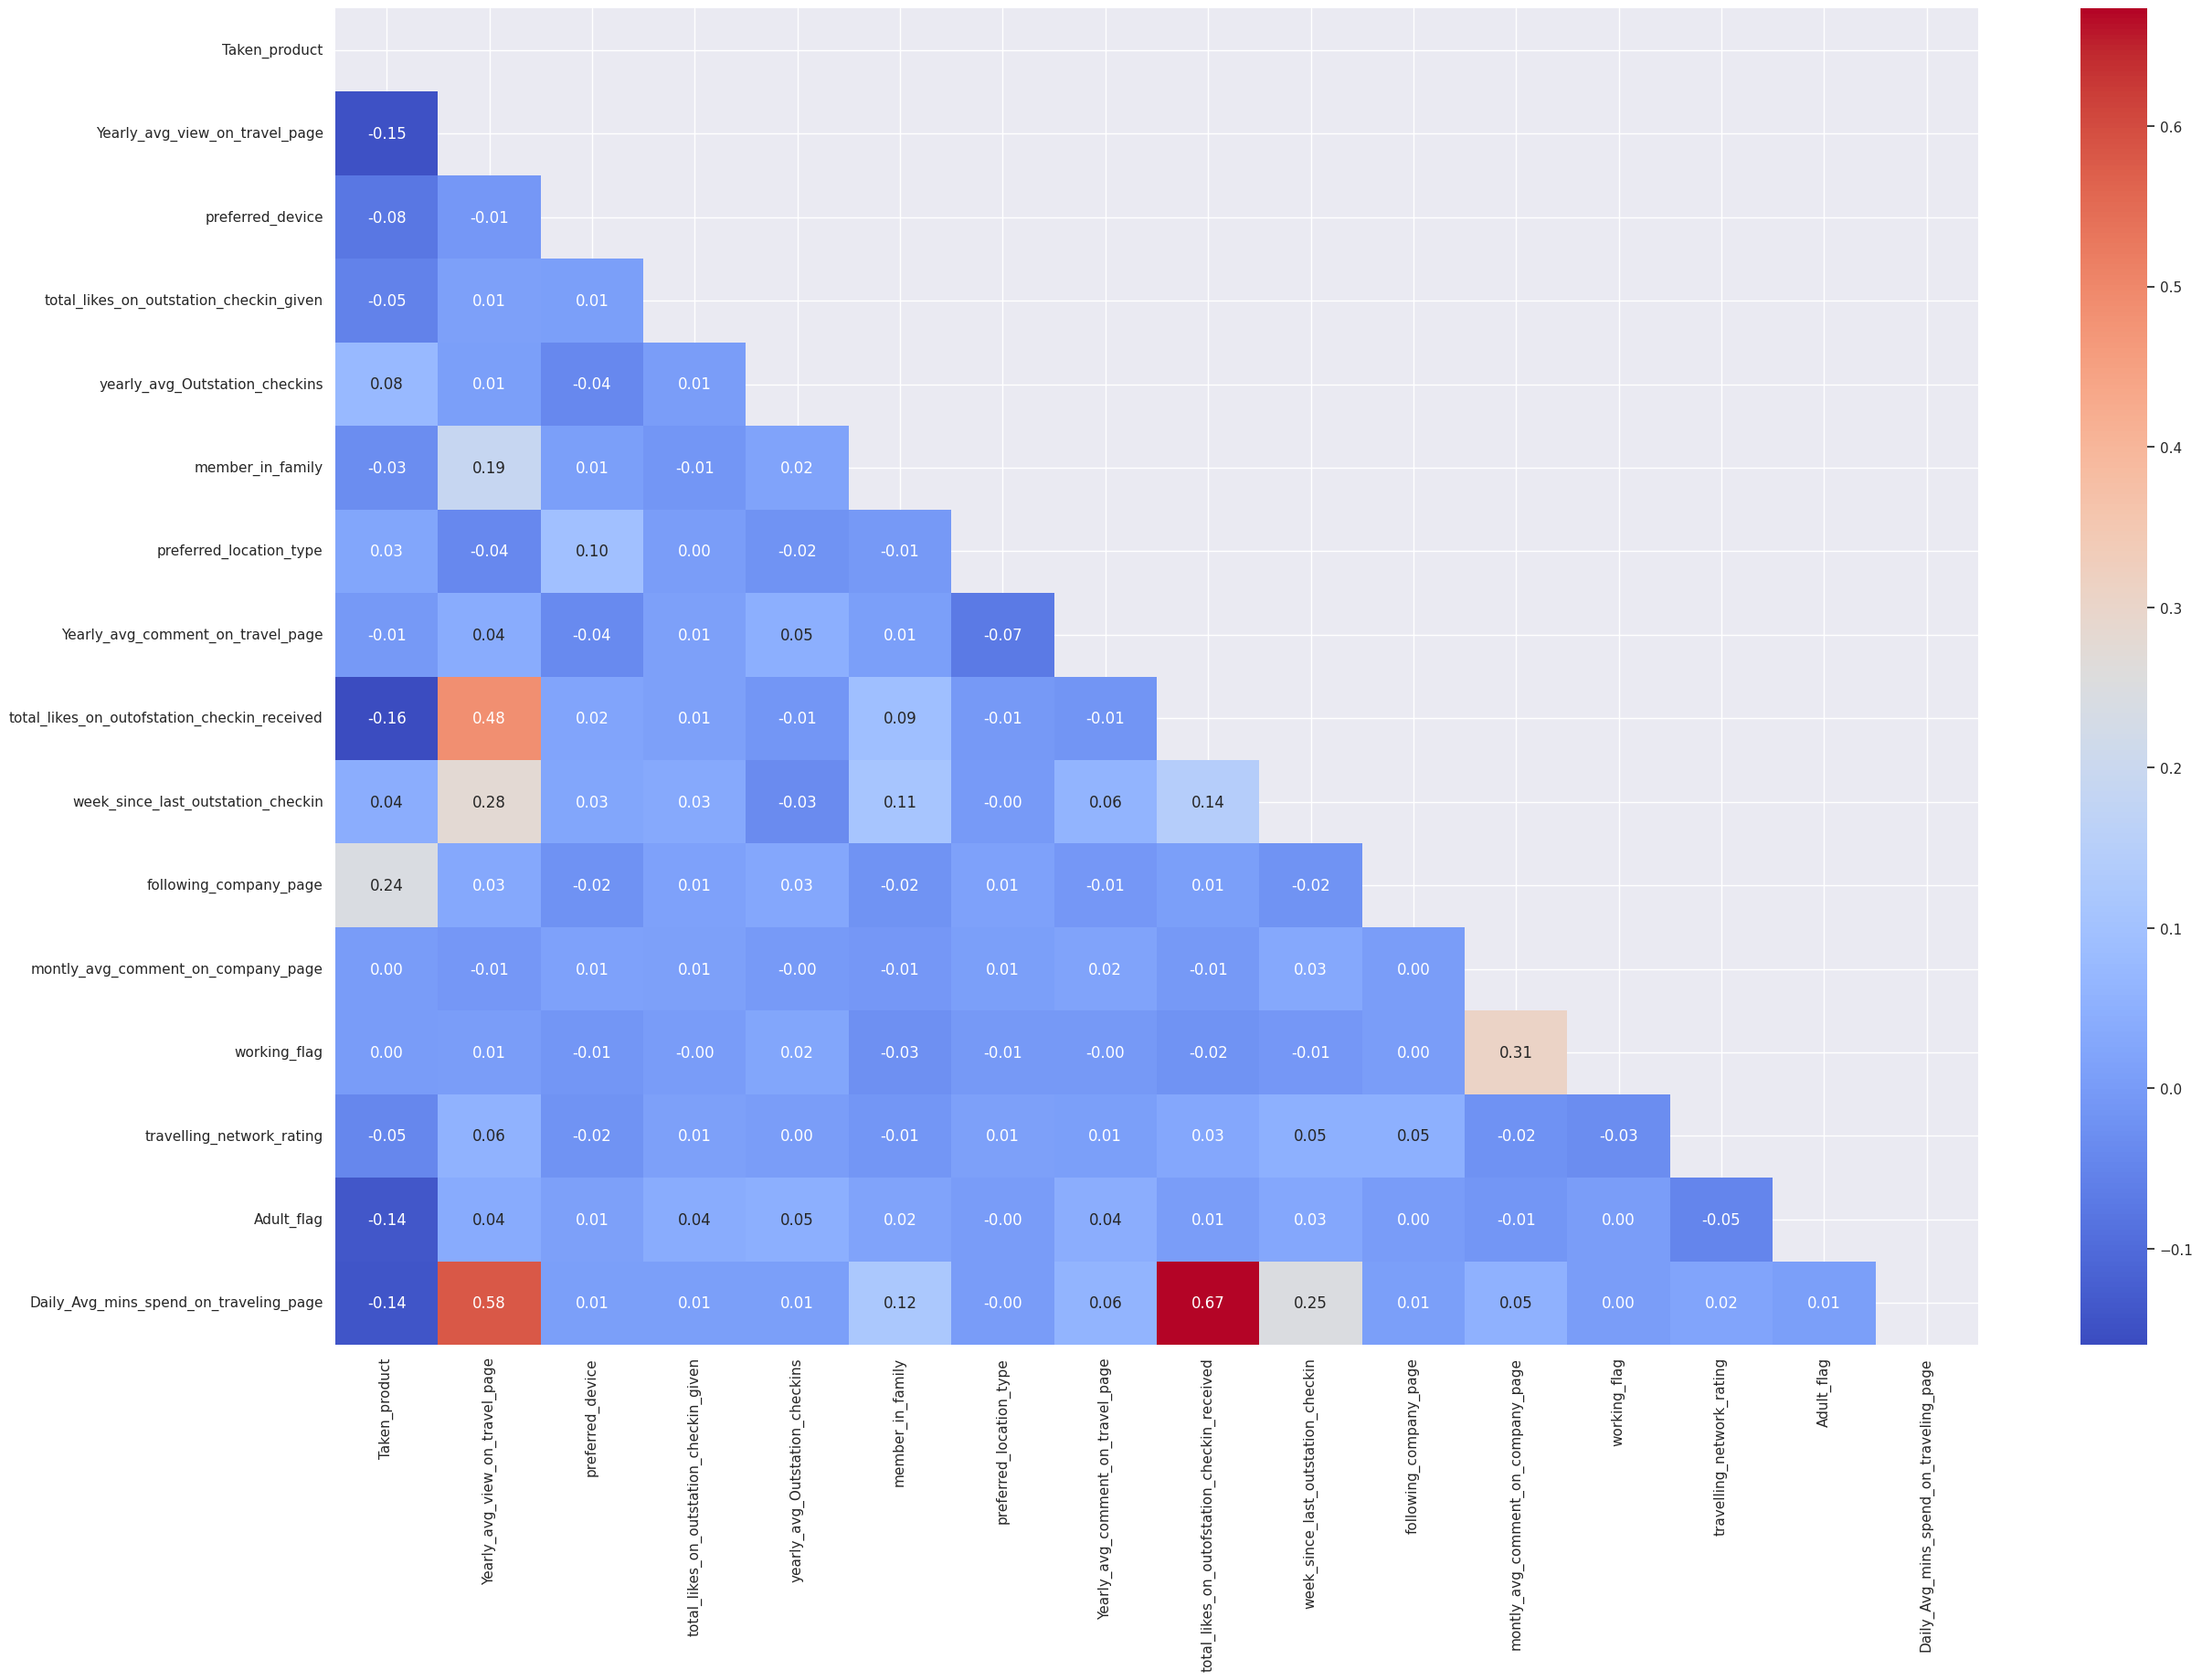

In [ ]:
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig = plt.subplots(figsize=(29,19))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask, cmap='coolwarm')
plt.show()

<Figure size 5000x3500 with 0 Axes>

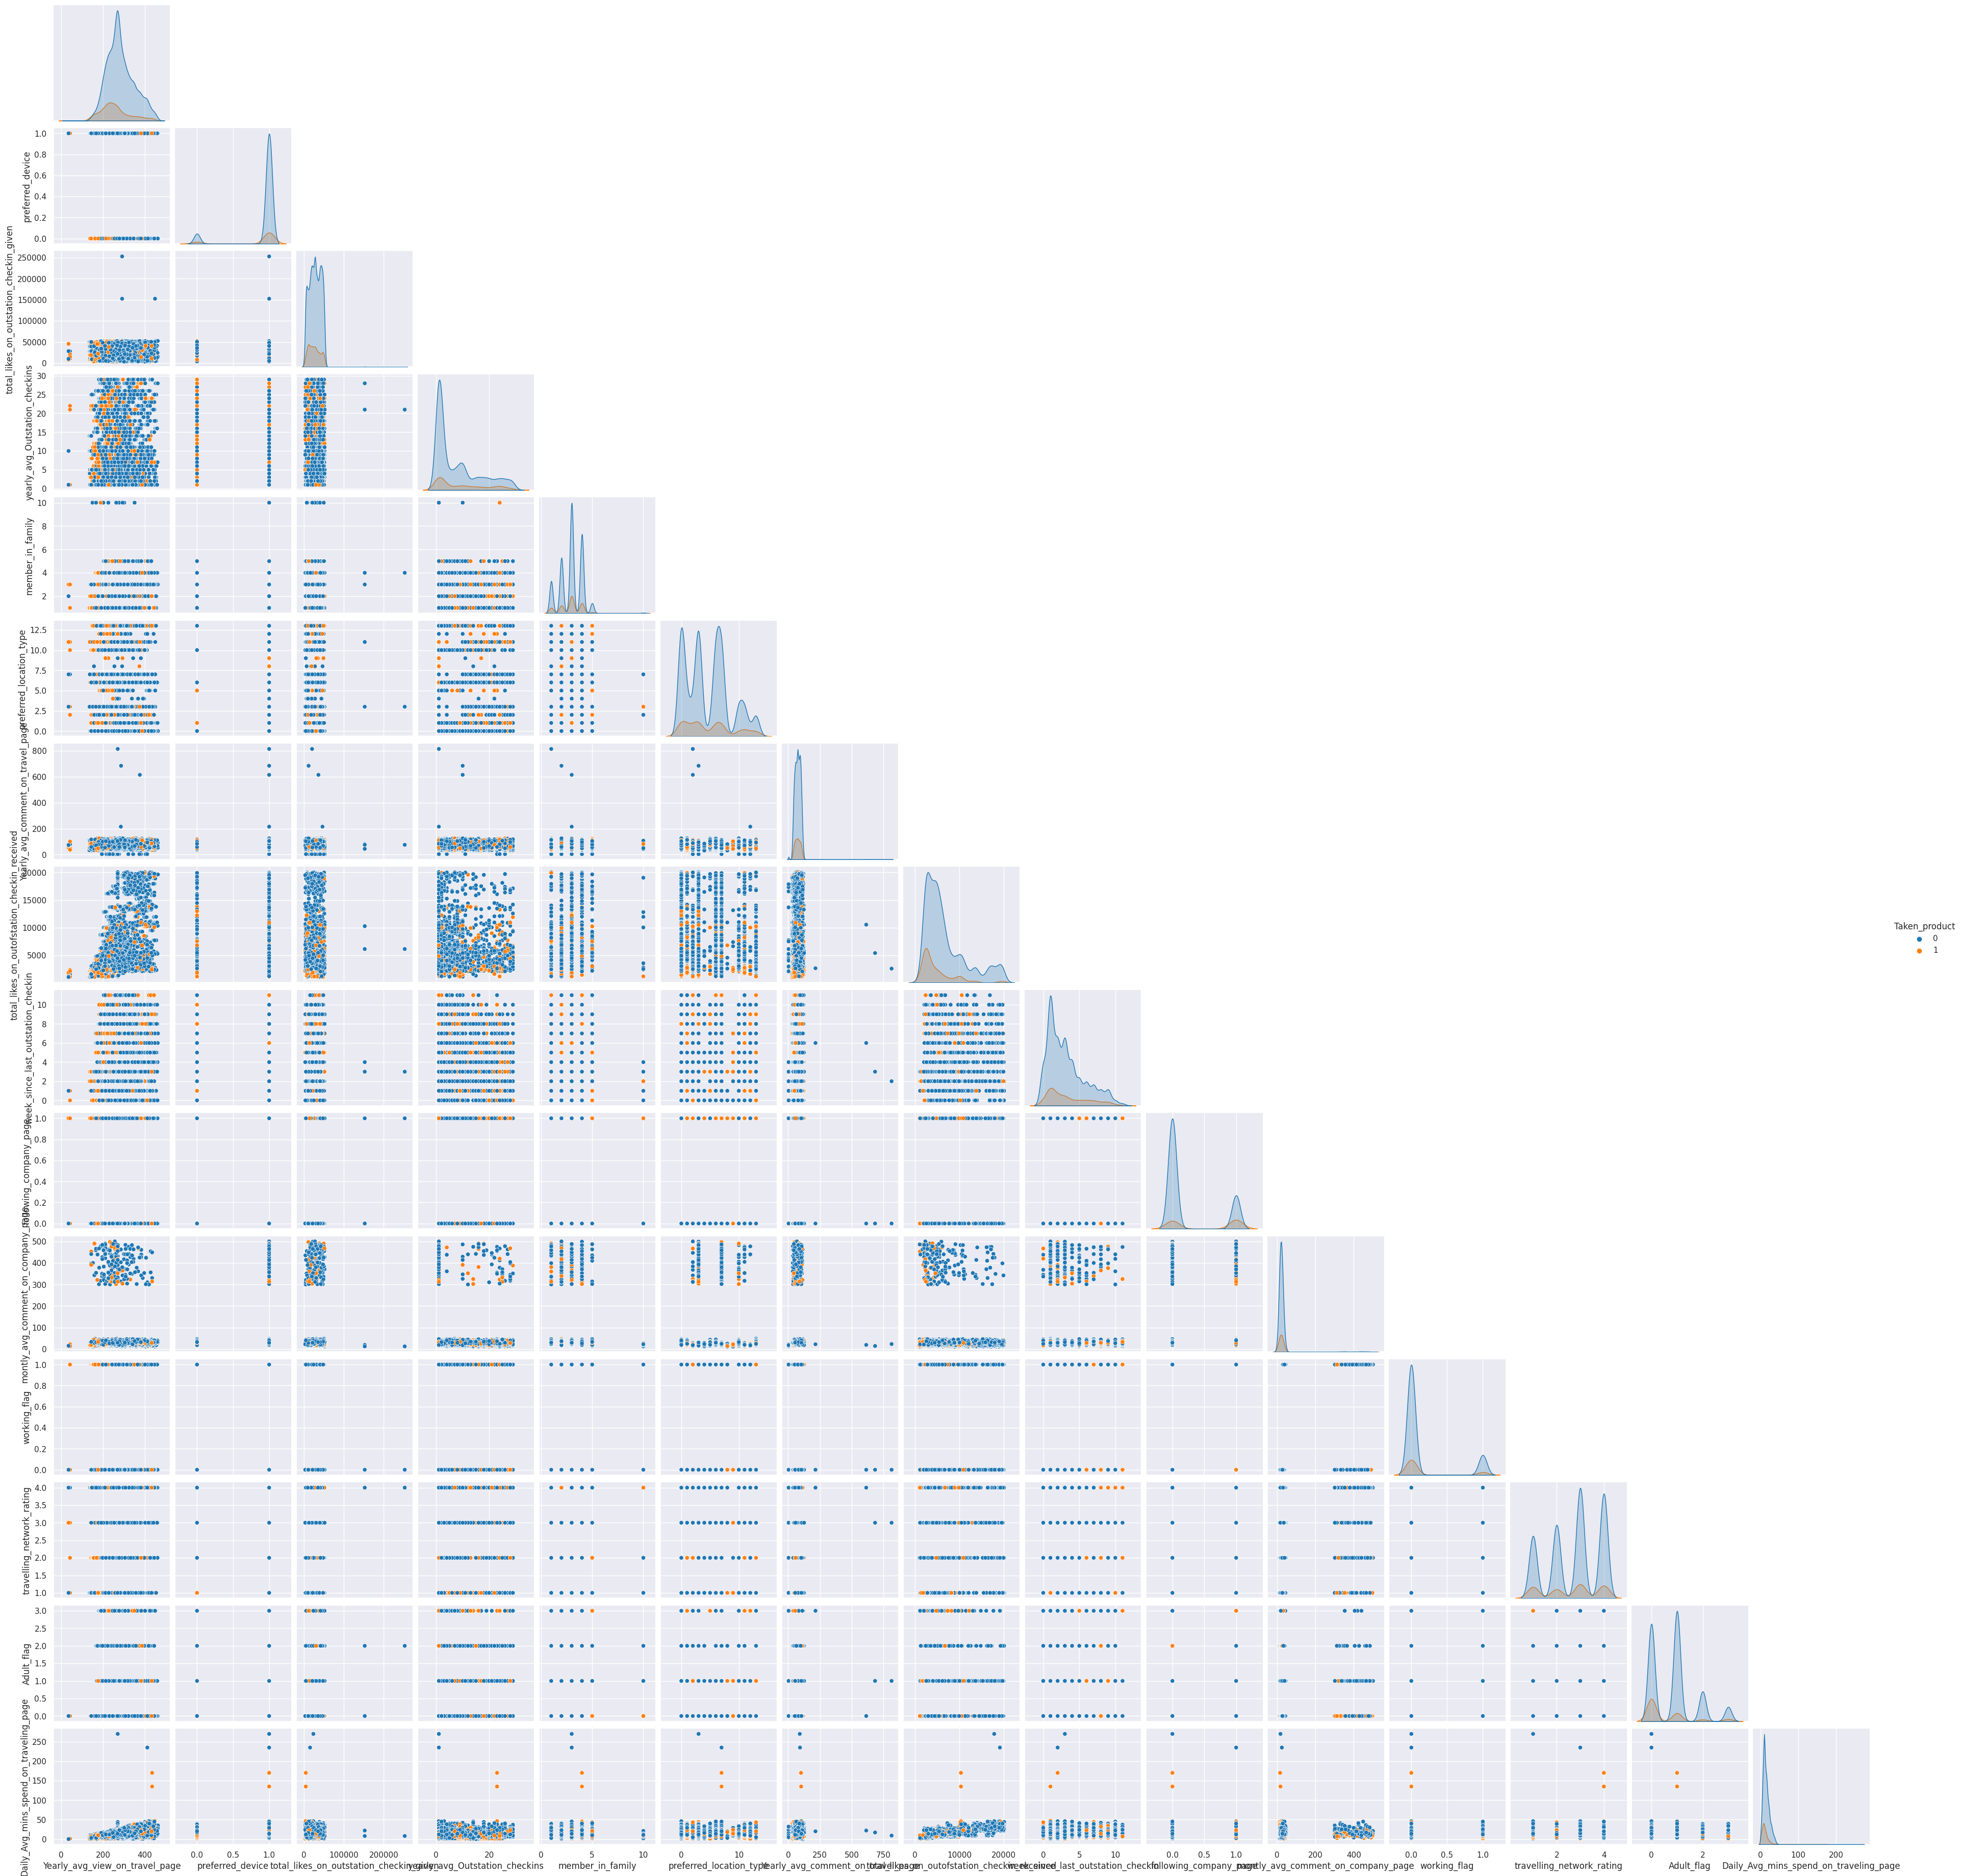

In [ ]:
plt.figure(figsize=(50,35))
sns.pairplot(df, hue ='Taken_product',corner=True)
plt.show()

# Outlier Treatment

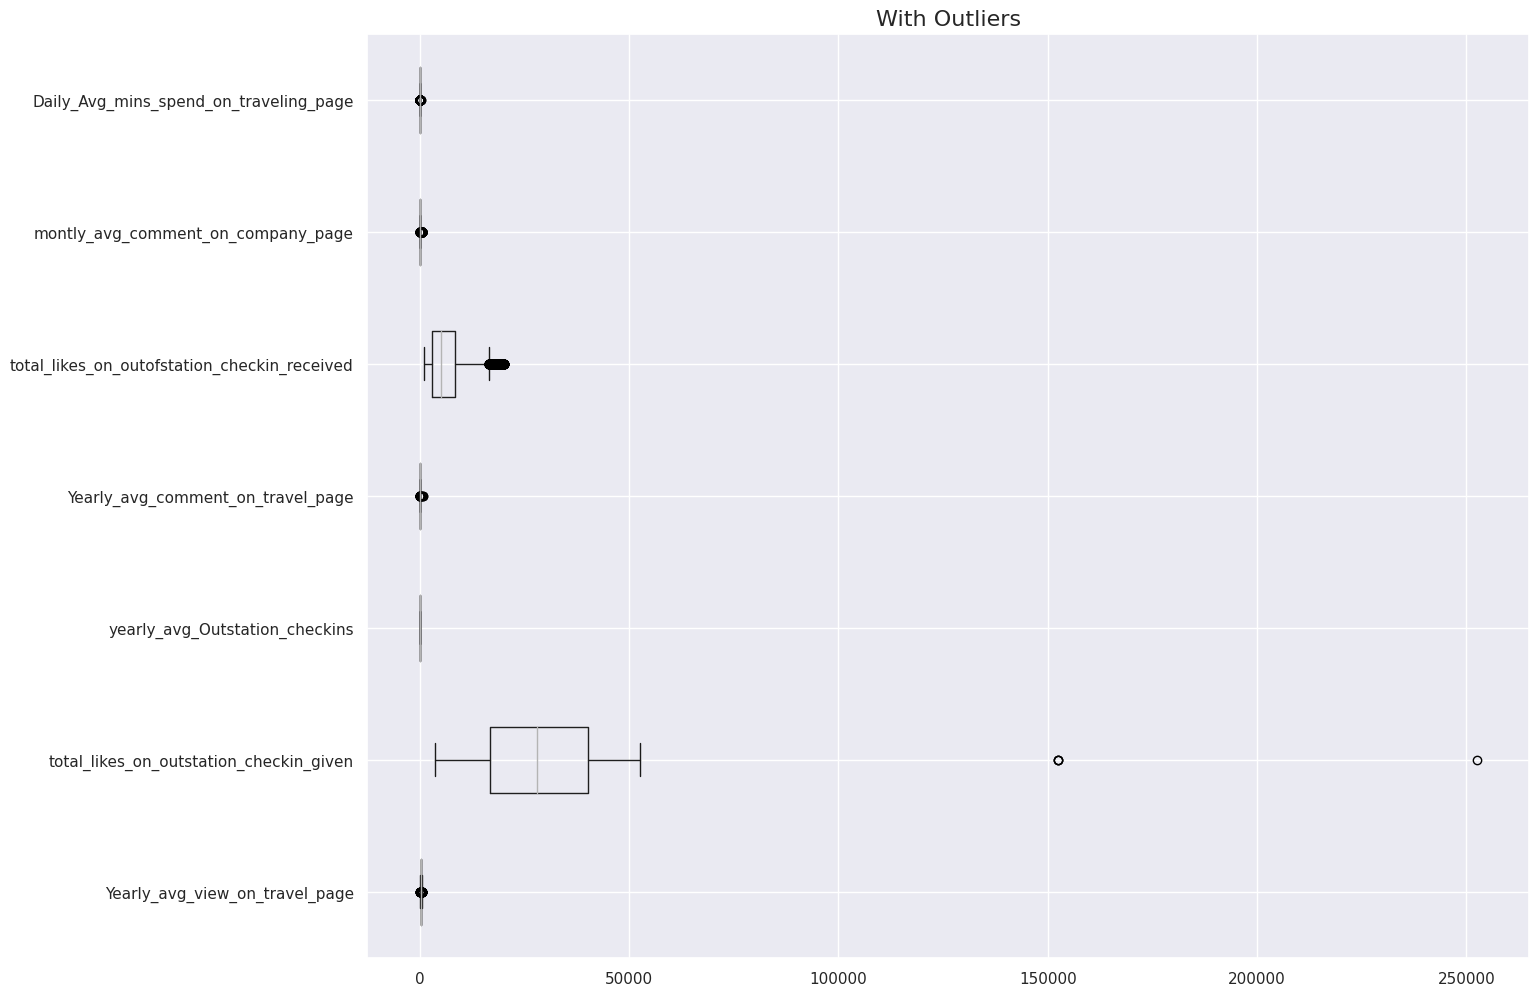

In [ ]:
Cont=['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given',
      'yearly_avg_Outstation_checkins','Yearly_avg_comment_on_travel_page',
      'total_likes_on_outofstation_checkin_received','montly_avg_comment_on_company_page',
      'Daily_Avg_mins_spend_on_traveling_page']
plt.figure(figsize=(15,12))
df[Cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in df[Cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

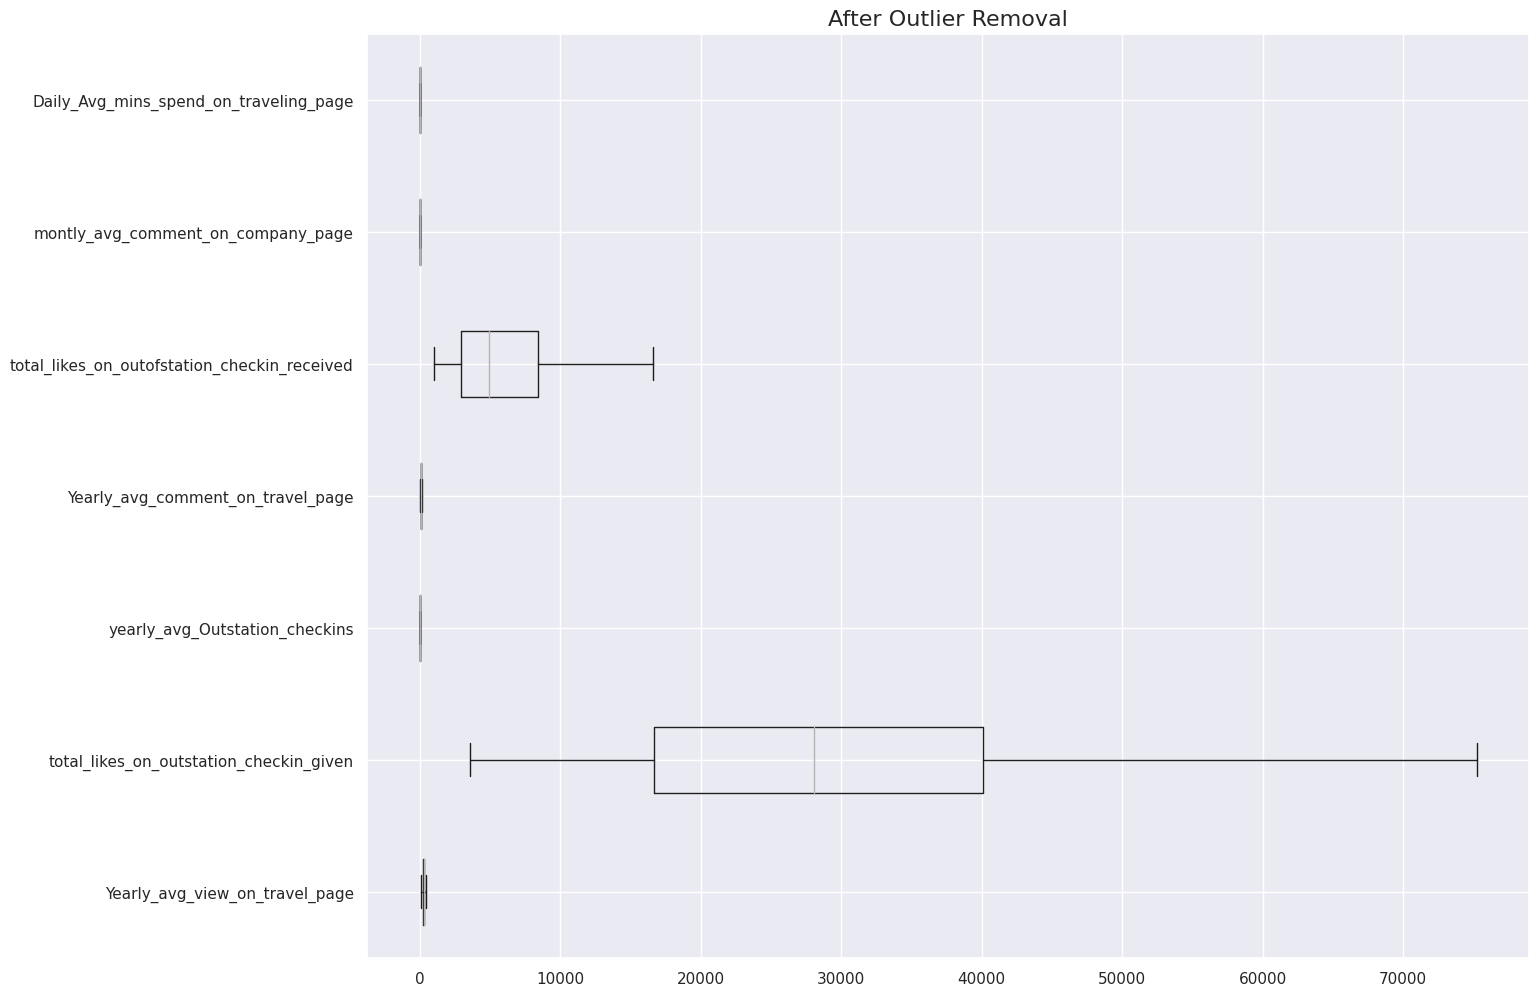

In [ ]:
plt.figure(figsize=(15,12))
df[Cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

**KMeans Clustering**

In [ ]:
df.head()

Taken_product  Yearly_avg_view_on_travel_page  preferred_device  \
0              1                           307.0               1.0   
1              0                           367.0               1.0   
2              1                           277.0               1.0   
3              0                           247.0               1.0   
4              0                           202.0               1.0   

   total_likes_on_outstation_checkin_given  yearly_avg_Outstation_checkins  \
0                                  38570.0                             1.0   
1                                   9765.0                             1.0   
2                                  48055.0                             1.0   
3                                  48720.0                             1.0   
4                                  20685.0                             1.0   

   member_in_family  preferred_location_type  \
0                 2                      3.0   
1                 1                      3.0   
2                 2                     10.0   
3                 4                      3.0   
4                 1                      7.0   

   Yearly_avg_comment_on_travel_page  \
0                               94.0   
1                               61.0   
2                               92.0   
3                               56.0   
4                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                        5993.0   
1                                        5130.0   
2                                        2090.0   
3                                        2909.0   
4                                        3468.0   

   week_since_last_outstation_checkin  following_company_page  \
0                                   8                     1.0   
1                                   1                     0.0   
2                                   6                     1.0   
3                                   1                     1.0   
4                                   9                     0.0   

   montly_avg_comment_on_company_page  working_flag  \
0                                11.0             0   
1                                23.0             1   
2                                15.0             0   
3                                11.0             0   
4                                12.0             0   

   travelling_network_rating  Adult_flag  \
0                          1           0   
1                          4           1   
2                          2           0   
3                          3           0   
4                          4           1   

   Daily_Avg_mins_spend_on_traveling_page  
0                                     8.0  
1                                    10.0  
2                                     7.0  
3                                     8.0  
4                                     6.0

In [ ]:
df_clust = df[['Taken_product','preferred_device', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag', 'travelling_network_rating','Adult_flag']]

In [ ]:
df_clust['Taken_product'].unique()

array([1, 0])

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_clust = df_clust.apply(le.fit_transform)
df_clust.head()

Taken_product  preferred_device  member_in_family  preferred_location_type  \
0              1                 1                 1                        3   
1              0                 1                 0                        3   
2              1                 1                 1                       10   
3              0                 1                 3                        3   
4              0                 1                 0                        7   

   following_company_page  working_flag  travelling_network_rating  Adult_flag  
0                       1             0                          0           0  
1                       0             1                          3           1  
2                       1             0                          1           0  
3                       1             0                          2           0  
4                       0             0                          3           1

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_df = pd.DataFrame(X.fit_transform(df_clust))

In [ ]:
scaled_df

0         1         2         3         4         5         6  \
0      2.280906  0.322518 -0.893927 -0.442403  1.602148 -0.426230 -1.584178   
1     -0.438422  0.322518 -1.868126 -0.442403 -0.624162  2.346151  1.191438   
2      2.280906  0.322518 -0.893927  1.387863  1.602148 -0.426230 -0.658973   
3     -0.438422  0.322518  1.054471 -0.442403  1.602148 -0.426230  0.266233   
4     -0.438422  0.322518 -1.868126  0.603463 -0.624162 -0.426230  1.191438   
...         ...       ...       ...       ...       ...       ...       ...   
11755 -0.438422 -3.100600 -0.893927  0.341996 -0.624162 -0.426230  0.266233   
11756 -0.438422  0.322518 -1.868126  0.341996 -0.624162 -0.426230 -1.584178   
11757 -0.438422  0.322518  0.080272 -1.226803  1.602148  2.346151 -0.658973   
11758 -0.438422 -3.100600  0.080272  0.341996 -0.624162 -0.426230  1.191438   
11759 -0.438422  0.322518  0.080272  0.341996 -0.624162 -0.426230 -1.584178   

              7  
0     -0.932014  
1      0.241988  
2     -0.932014  
3     -0.932014  
4      0.241988  
...         ...  
11755  0.241988  
11756  0.241988  
11757  0.241988  
11758 -0.932014  
11759 -0.932014  

[11760 rows x 8 columns]

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 2,random_state=1)

In [ ]:
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

In [ ]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means = KMeans(n_clusters =2,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
silhouette_score(scaled_df,labels,random_state=1)

0.24783846193116116

In [ ]:
df["Clus_kmeans4"] = labels
df.head()

Taken_product  Yearly_avg_view_on_travel_page  preferred_device  \
0              1                           307.0               1.0   
1              0                           367.0               1.0   
2              1                           277.0               1.0   
3              0                           247.0               1.0   
4              0                           202.0               1.0   

   total_likes_on_outstation_checkin_given  yearly_avg_Outstation_checkins  \
0                                  38570.0                             1.0   
1                                   9765.0                             1.0   
2                                  48055.0                             1.0   
3                                  48720.0                             1.0   
4                                  20685.0                             1.0   

   member_in_family  preferred_location_type  \
0                 2                      3.0   
1                 1                      3.0   
2                 2                     10.0   
3                 4                      3.0   
4                 1                      7.0   

   Yearly_avg_comment_on_travel_page  \
0                               94.0   
1                               61.0   
2                               92.0   
3                               56.0   
4                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                        5993.0   
1                                        5130.0   
2                                        2090.0   
3                                        2909.0   
4                                        3468.0   

   week_since_last_outstation_checkin  following_company_page  \
0                                   8                     1.0   
1                                   1                     0.0   
2                                   6                     1.0   
3                                   1                     1.0   
4                                   9                     0.0   

   montly_avg_comment_on_company_page  working_flag  \
0                                11.0             0   
1                                23.0             1   
2                                15.0             0   
3                                11.0             0   
4                                12.0             0   

   travelling_network_rating  Adult_flag  \
0                          1           0   
1                          4           1   
2                          2           0   
3                          3           0   
4                          4           1   

   Daily_Avg_mins_spend_on_traveling_page  Clus_kmeans4  
0                                     8.0             0  
1                                    10.0             1  
2                                     7.0             0  
3                                     8.0             1  
4                                     6.0             1

In [ ]:
df.Clus_kmeans4.value_counts().sort_index()

0    1896
1    9864
Name: Clus_kmeans4, dtype: int64

In [ ]:
df["Clus_kmeans4"] = labels
df.head()

Taken_product  Yearly_avg_view_on_travel_page  preferred_device  \
0              1                           307.0               1.0   
1              0                           367.0               1.0   
2              1                           277.0               1.0   
3              0                           247.0               1.0   
4              0                           202.0               1.0   

   total_likes_on_outstation_checkin_given  yearly_avg_Outstation_checkins  \
0                                  38570.0                             1.0   
1                                   9765.0                             1.0   
2                                  48055.0                             1.0   
3                                  48720.0                             1.0   
4                                  20685.0                             1.0   

   member_in_family  preferred_location_type  \
0                 2                      3.0   
1                 1                      3.0   
2                 2                     10.0   
3                 4                      3.0   
4                 1                      7.0   

   Yearly_avg_comment_on_travel_page  \
0                               94.0   
1                               61.0   
2                               92.0   
3                               56.0   
4                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                        5993.0   
1                                        5130.0   
2                                        2090.0   
3                                        2909.0   
4                                        3468.0   

   week_since_last_outstation_checkin  following_company_page  \
0                                   8                     1.0   
1                                   1                     0.0   
2                                   6                     1.0   
3                                   1                     1.0   
4                                   9                     0.0   

   montly_avg_comment_on_company_page  working_flag  \
0                                11.0             0   
1                                23.0             1   
2                                15.0             0   
3                                11.0             0   
4                                12.0             0   

   travelling_network_rating  Adult_flag  \
0                          1           0   
1                          4           1   
2                          2           0   
3                          3           0   
4                          4           1   

   Daily_Avg_mins_spend_on_traveling_page  Clus_kmeans4  
0                                     8.0             0  
1                                    10.0             1  
2                                     7.0             0  
3                                     8.0             1  
4                                     6.0             1

In [ ]:
clus01 = df[df['Clus_kmeans4']==0]
clus02 = df[df['Clus_kmeans4']==1]

In [ ]:
clus01['Taken_product'].value_counts()

1    1896
Name: Taken_product, dtype: int64

In [ ]:
clus02['Taken_product'].value_counts()

0    9864
Name: Taken_product, dtype: int64

In [ ]:
clus01['preferred_device'].value_counts()

1.0    1620
0.0     276
Name: preferred_device, dtype: int64

In [ ]:
clus02['preferred_device'].value_counts()

1.0    9032
0.0     832
Name: preferred_device, dtype: int64

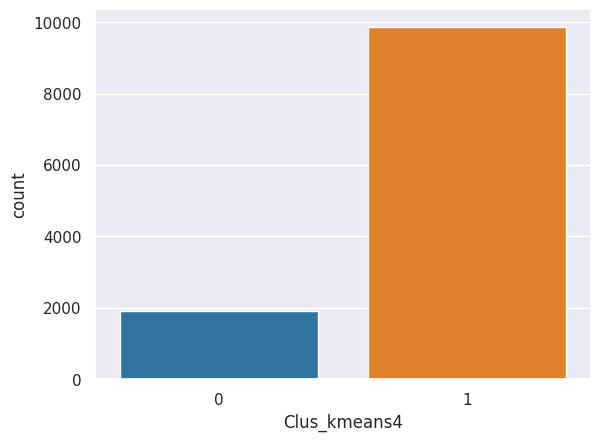

In [ ]:
sns.countplot(x=df['Clus_kmeans4'])
plt.show()

<Axes: xlabel='Yearly_avg_view_on_travel_page', ylabel='total_likes_on_outofstation_checkin_received'>

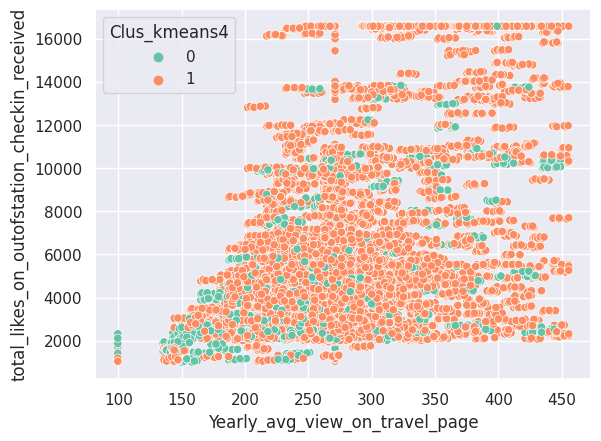

In [ ]:
sns.scatterplot(x=df['Yearly_avg_view_on_travel_page'], y=df['total_likes_on_outofstation_checkin_received'], hue=df['Clus_kmeans4'], palette='Set2')

<Axes: xlabel='preferred_device', ylabel='total_likes_on_outofstation_checkin_received'>

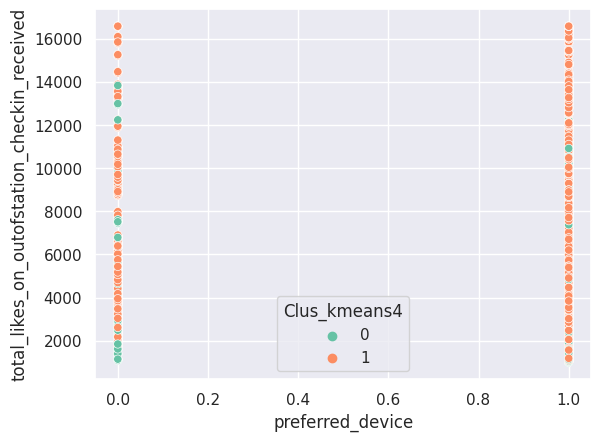

In [ ]:
sns.scatterplot(x=df['preferred_device'], y=df['total_likes_on_outofstation_checkin_received'], hue=df['Clus_kmeans4'], palette='Set2')

# Not much could be derived from clusterring

In [ ]:
print(df.columns)

Index(['Taken_product', 'Yearly_avg_view_on_travel_page', 'preferred_device',
       'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page', 'Clus_kmeans4'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  int64  
 1   Yearly_avg_view_on_travel_page                11760 non-null  float64
 2   preferred_device                              11760 non-null  float64
 3   total_likes_on_outstation_checkin_given       11760 non-null  float64
 4   yearly_avg_Outstation_checkins                11760 non-null  float64
 5   member_in_family                              11760 non-null  int64  
 6   preferred_location_type                       11760 non-null  float64
 7   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  float64
 9   week_since_last_outstation_checkin            11760 non-null 

In [ ]:
df.head()

Taken_product  Yearly_avg_view_on_travel_page  preferred_device  \
0              1                           307.0               1.0   
1              0                           367.0               1.0   
2              1                           277.0               1.0   
3              0                           247.0               1.0   
4              0                           202.0               1.0   

   total_likes_on_outstation_checkin_given  yearly_avg_Outstation_checkins  \
0                                  38570.0                             1.0   
1                                   9765.0                             1.0   
2                                  48055.0                             1.0   
3                                  48720.0                             1.0   
4                                  20685.0                             1.0   

   member_in_family  preferred_location_type  \
0                 2                      3.0   
1                 1                      3.0   
2                 2                     10.0   
3                 4                      3.0   
4                 1                      7.0   

   Yearly_avg_comment_on_travel_page  \
0                               94.0   
1                               61.0   
2                               92.0   
3                               56.0   
4                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                        5993.0   
1                                        5130.0   
2                                        2090.0   
3                                        2909.0   
4                                        3468.0   

   week_since_last_outstation_checkin  following_company_page  \
0                                   8                     1.0   
1                                   1                     0.0   
2                                   6                     1.0   
3                                   1                     1.0   
4                                   9                     0.0   

   montly_avg_comment_on_company_page  working_flag  \
0                                11.0             0   
1                                23.0             1   
2                                15.0             0   
3                                11.0             0   
4                                12.0             0   

   travelling_network_rating  Adult_flag  \
0                          1           0   
1                          4           1   
2                          2           0   
3                          3           0   
4                          4           1   

   Daily_Avg_mins_spend_on_traveling_page  Clus_kmeans4  
0                                     8.0             0  
1                                    10.0             1  
2                                     7.0             0  
3                                     8.0             1  
4                                     6.0             1

In [ ]:
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve
from collections import Counter
from sklearn.metrics import classification_report

# Data split for df1_laptop dataset

In [ ]:
X = df1_laptop.drop('Taken_product', axis=1)
y = df1_laptop['Taken_product']

In [ ]:
X_train,X_test, y_train, y_test=train_test_split(X,y,train_size=0.70, random_state=1)

In [ ]:
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])

The number of records in the training dataset is 775


In [ ]:
# Check the number of records
print('The number of records in the test dataset is', X_test.shape[0])

The number of records in the test dataset is 333


In [ ]:
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The training dataset has 594 records for the majority class and 181 records for the minority class.


In [ ]:
X_train.head()

Yearly_avg_view_on_travel_page  preferred_device  \
9404                            328.0               0.0   
9788                            281.0               0.0   
10215                           246.0               0.0   
7916                            365.0               0.0   
10024                           370.0               0.0   

       total_likes_on_outstation_checkin_given  \
9404                                   20006.0   
9788                                   21306.0   
10215                                  26433.0   
7916                                   25177.0   
10024                                  24832.0   

       yearly_avg_Outstation_checkins  member_in_family  \
9404                              8.0                 3   
9788                              7.0                 3   
10215                            26.0                 4   
7916                             27.0                 2   
10024                             7.0                 2   

       preferred_location_type  Yearly_avg_comment_on_travel_page  \
9404                       0.0                               81.0   
9788                       1.0                               96.0   
10215                      1.0                               86.0   
7916                       0.0                               85.0   
10024                      6.0                              113.0   

       total_likes_on_outofstation_checkin_received  \
9404                                          18493   
9788                                           4691   
10215                                          5685   
7916                                           6404   
10024                                          2718   

       week_since_last_outstation_checkin  following_company_page  \
9404                                    2                     0.0   
9788                                    3                     0.0   
10215                                   3                     1.0   
7916                                    4                     1.0   
10024                                   4                     1.0   

       montly_avg_comment_on_company_page  working_flag  \
9404                                   26             0   
9788                                   35             0   
10215                                  32             0   
7916                                   24             0   
10024                                  23             0   

       travelling_network_rating  Adult_flag  \
9404                           2           1   
9788                           4           1   
10215                          3           0   
7916                           4           0   
10024                          3           2   

       Daily_Avg_mins_spend_on_traveling_page  
9404                                       34  
9788                                       21  
10215                                      17  
7916                                        8  
10024                                      26

In [ ]:
X_train.isnull().sum()

NameError: ignored

# Creating Models for Laptop users


# Taking the best selected features from RFE

In [ ]:
df_new = df[['Yearly_avg_view_on_travel_page','total_likes_on_outstation_checkin_given','yearly_avg_Outstation_checkins',
             'member_in_family', 'Yearly_avg_comment_on_travel_page','total_likes_on_outofstation_checkin_received',
             'week_since_last_outstation_checkin','following_company_page','travelling_network_rating','Adult_flag',
             'Taken_product', 'preferred_device']]

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Yearly_avg_view_on_travel_page                11760 non-null  float64
 1   total_likes_on_outstation_checkin_given       11760 non-null  float64
 2   yearly_avg_Outstation_checkins                11760 non-null  float64
 3   member_in_family                              11760 non-null  int64  
 4   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 5   total_likes_on_outofstation_checkin_received  11760 non-null  float64
 6   week_since_last_outstation_checkin            11760 non-null  int64  
 7   following_company_page                        11760 non-null  float64
 8   travelling_network_rating                     11760 non-null  int64  
 9   Adult_flag                                    11760 non-null 

# WE will divided the dataset into 2 dataframes one each for Laptop users and Mobile users

In [ ]:
df1_laptop = df_new[df_new['preferred_device'] <= 0]

In [ ]:
df1_laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 5881 to 11758
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Yearly_avg_view_on_travel_page                1108 non-null   float64
 1   total_likes_on_outstation_checkin_given       1108 non-null   float64
 2   yearly_avg_Outstation_checkins                1108 non-null   float64
 3   member_in_family                              1108 non-null   int64  
 4   Yearly_avg_comment_on_travel_page             1108 non-null   float64
 5   total_likes_on_outofstation_checkin_received  1108 non-null   float64
 6   week_since_last_outstation_checkin            1108 non-null   int64  
 7   following_company_page                        1108 non-null   float64
 8   travelling_network_rating                     1108 non-null   int64  
 9   Adult_flag                                    1108 non-null

In [ ]:
df2_mobile = df_new[df_new['preferred_device'] >= 1]

In [ ]:
df2_mobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10652 entries, 0 to 11759
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Yearly_avg_view_on_travel_page                10652 non-null  float64
 1   total_likes_on_outstation_checkin_given       10652 non-null  float64
 2   yearly_avg_Outstation_checkins                10652 non-null  float64
 3   member_in_family                              10652 non-null  int64  
 4   Yearly_avg_comment_on_travel_page             10652 non-null  float64
 5   total_likes_on_outofstation_checkin_received  10652 non-null  float64
 6   week_since_last_outstation_checkin            10652 non-null  int64  
 7   following_company_page                        10652 non-null  float64
 8   travelling_network_rating                     10652 non-null  int64  
 9   Adult_flag                                    10652 non-null 

In [ ]:
df2_mobile.drop('preferred_device', axis=1, inplace=True)

In [ ]:
df2_mobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10652 entries, 0 to 11759
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Yearly_avg_view_on_travel_page                10652 non-null  float64
 1   total_likes_on_outstation_checkin_given       10652 non-null  float64
 2   yearly_avg_Outstation_checkins                10652 non-null  float64
 3   member_in_family                              10652 non-null  int64  
 4   Yearly_avg_comment_on_travel_page             10652 non-null  float64
 5   total_likes_on_outofstation_checkin_received  10652 non-null  float64
 6   week_since_last_outstation_checkin            10652 non-null  int64  
 7   following_company_page                        10652 non-null  float64
 8   travelling_network_rating                     10652 non-null  int64  
 9   Adult_flag                                    10652 non-null 

# Build Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
X = df1_laptop.drop('Taken_product', axis=1)
y = df1_laptop['Taken_product']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.963963963963964


In [ ]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [ ]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8219354838709677
0.8108108108108109


# Baseline Random Forest Model for unbalanced data for LAptop dataset

In [ ]:
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve
from collections import Counter
from sklearn.metrics import classification_report

In [ ]:
X = df1_laptop.drop('Taken_product', axis=1)
y = df1_laptop['Taken_product']
X_train,X_test, y_train, y_test=train_test_split(X,y,train_size=0.70, random_state=1)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])

The number of records in the training dataset is 775


In [ ]:
# Check the number of records
print('The number of records in the test dataset is', X_test.shape[0])

The number of records in the test dataset is 333


In [ ]:
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The training dataset has 594 records for the majority class and 181 records for the minority class.


In [ ]:
# To understand the differences of different random states affecting Out-of-Bag score
random_state=[0,23,42]
for i in random_state:
    rf=RandomForestClassifier(random_state=i,oob_score=True)
    rf.fit(X_train,y_train)
    print(rf.oob_score_)

0.9780645161290322
0.9780645161290322
0.9780645161290322


In [ ]:
rfcl = RandomForestClassifier(n_estimators = 100,max_features=6,random_state=0)
rfcl = rfcl.fit(X_train, y_train)
rfcl

RandomForestClassifier(max_features=6, random_state=0)

# Predicting Train and Test data with the RF Model

In [ ]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

# Train Accuracy

In [ ]:
rfcl.score(X_train,y_train)

1.0

In [ ]:
rfcl.score(X_test,y_test)

0.990990990990991

# Evaluating model performance with confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

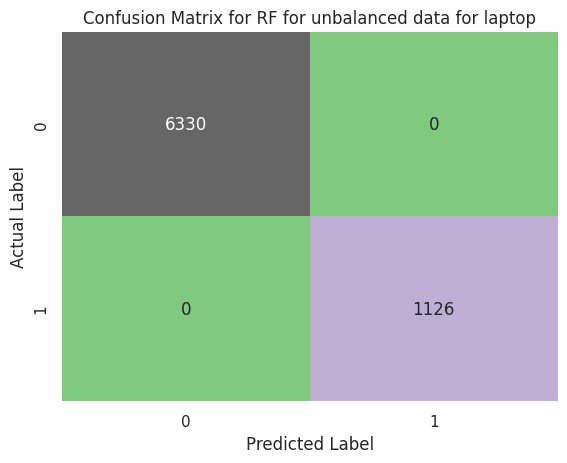

In [ ]:
# Get the confusion matrix on the train data
confusion_matrix(y_train,ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for RF for unbalanced data for laptop')
plt.show()

In [ ]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



In [ ]:
print('Accuracy', ((594+181)/(594+181)))
print('Sensitivity',((181/181))) #TP/Actual yes
print('Specificity',(594/594)) #TN/Actual no
print('Precision',(181/181)) #TP/Predicted yes

Accuracy 1.0
Sensitivity 1.0
Specificity 1.0
Precision 1.0


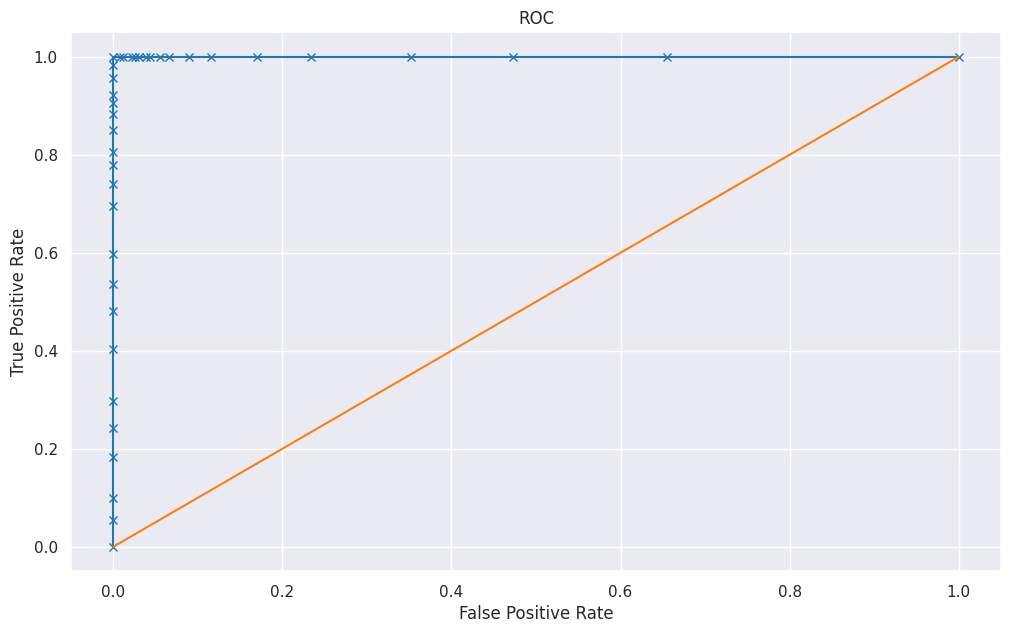

Area under Curve is 1.0


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,rfcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,rfcl.predict_proba(X_train)[:,1]))

# Evaluating model performance on the test data

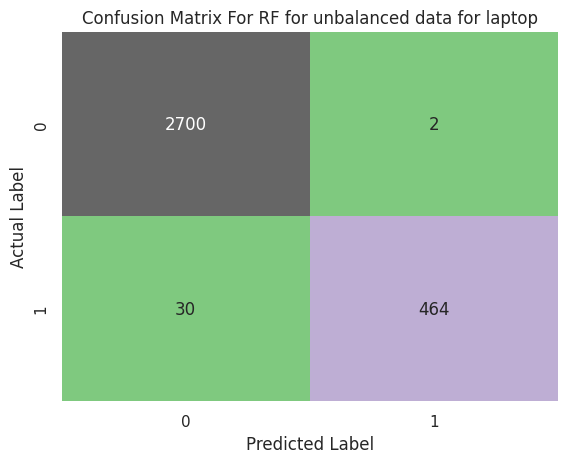

In [ ]:
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix For RF for unbalanced data for laptop')
plt.show()

In [ ]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       238
           1       1.00      0.97      0.98        95

    accuracy                           0.99       333
   macro avg       0.99      0.98      0.99       333
weighted avg       0.99      0.99      0.99       333



# Test Accuracy

In [ ]:
rfcl.score(X_test,y_test)

0.990990990990991

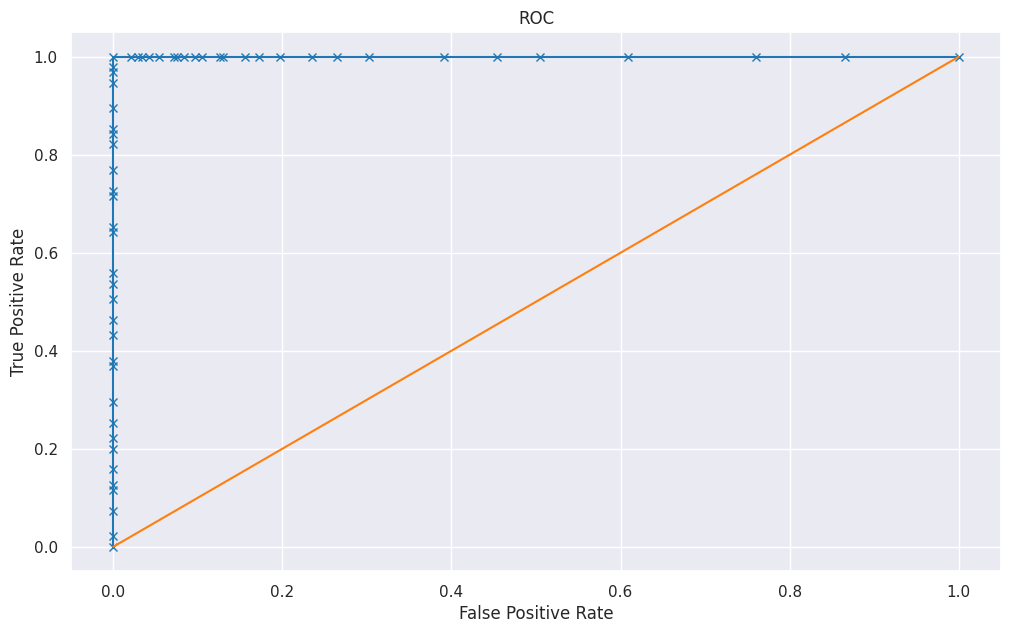

Area under Curve is 1.0


In [ ]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,rfcl.predict_proba(X_test)[:,1]))

# Baseline Random Forest Model for unbalanced data for Mobile dataset

In [ ]:
X = df2_mobile.drop('Taken_product', axis=1)
y = df2_mobile['Taken_product']
X_train,X_test, y_train, y_test=train_test_split(X,y,train_size=0.70, random_state=1)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])

The number of records in the training dataset is 7456


In [ ]:
print('The number of records in the test dataset is', X_test.shape[0])

The number of records in the test dataset is 3196


In [ ]:
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The training dataset has 6330 records for the majority class and 1126 records for the minority class.


In [ ]:
# To understand the differences of different random states affecting Out-of-Bag score
random_state=[0,23,42]
for i in random_state:
    rf=RandomForestClassifier(random_state=i,oob_score=True)
    rf.fit(X_train,y_train)
    print(rf.oob_score_)

0.9876609442060086
0.9887339055793991
0.9875268240343348


In [ ]:
rfcl = RandomForestClassifier(n_estimators = 100,max_features=6,random_state=0)
rfcl = rfcl.fit(X_train, y_train)
rfcl

RandomForestClassifier(max_features=6, random_state=0)

# Predicting Train and Test data with the RF Model

In [ ]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

NameError: ignored

# Train Accuracy

In [ ]:
rfcl.score(X_train,y_train)

1.0

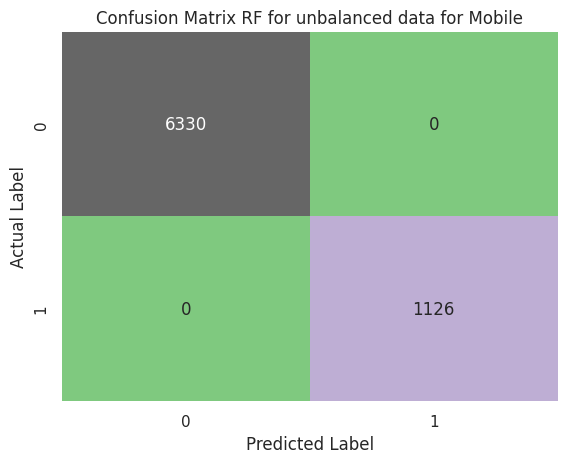

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



In [ ]:
# Get the confusion matrix on the train data
confusion_matrix(y_train,ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix RF for unbalanced data for Mobile')
plt.show()

print(classification_report(y_train,ytrain_predict))

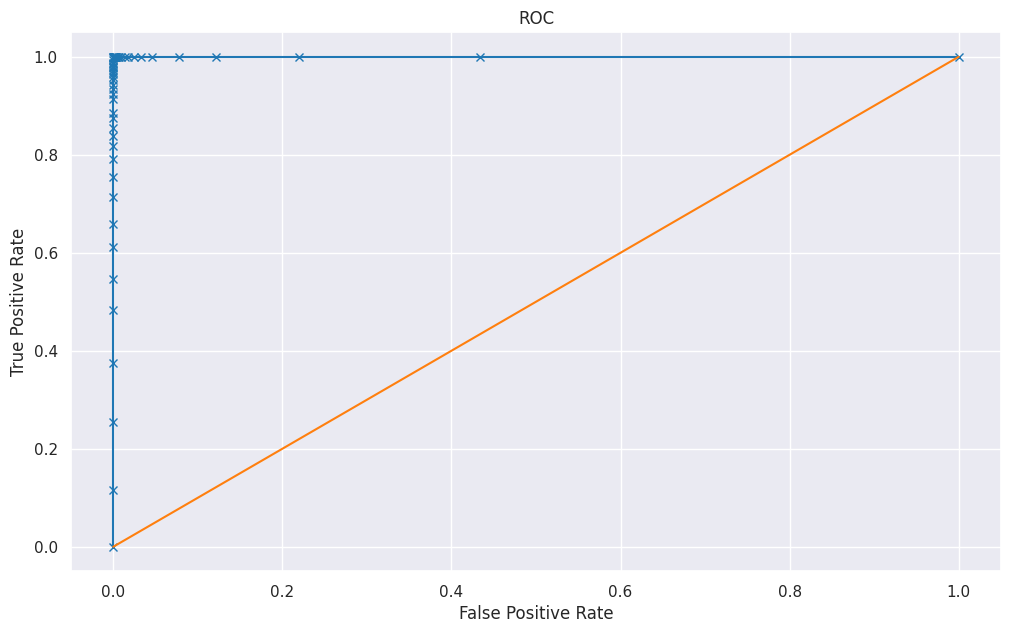

Area under Curve is 1.0


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,rfcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,rfcl.predict_proba(X_train)[:,1]))

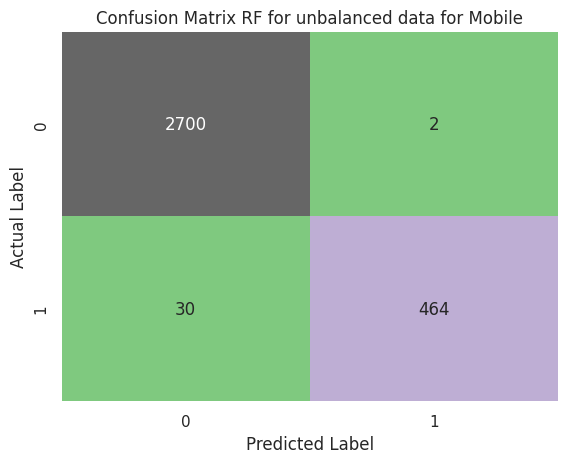

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2702
           1       1.00      0.94      0.97       494

    accuracy                           0.99      3196
   macro avg       0.99      0.97      0.98      3196
weighted avg       0.99      0.99      0.99      3196



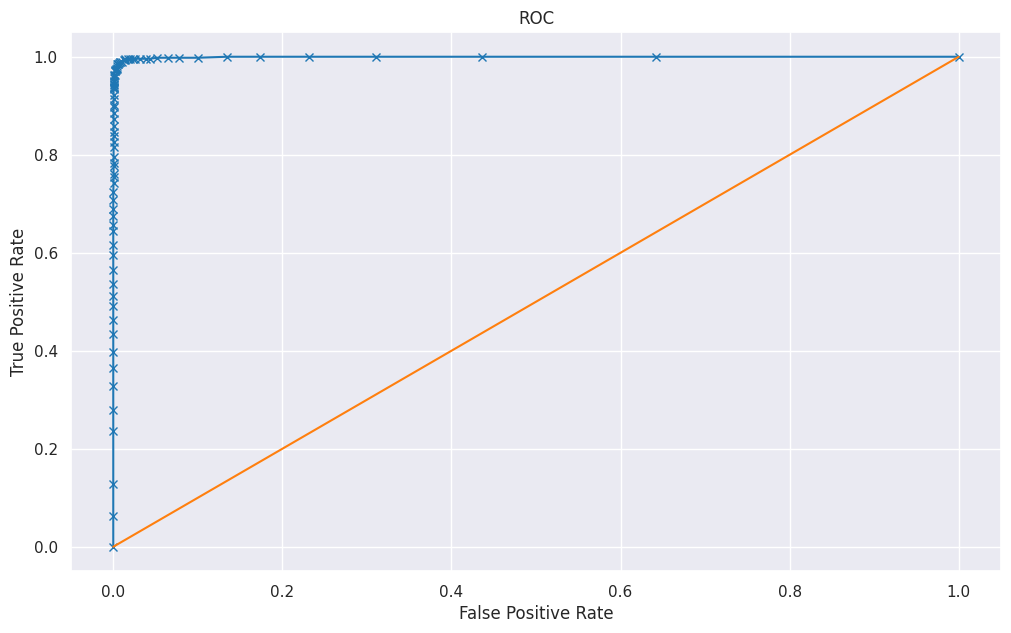

Area under Curve is 0.9993980317473636


In [ ]:
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix RF for unbalanced data for Mobile')
plt.show()

print(classification_report(y_test,ytest_predict))

#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,rfcl.predict_proba(X_test)[:,1]))

# Test Accuracy

In [ ]:
rfcl.score(X_test,y_test)

0.9899874843554443

# SMOTE Oversampling for Imbalanced Laptop Dataset

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)

print(sorted(Counter(y_train_smote).items()))

[(0, 6330), (1, 6330)]


# Now let’s run the same random forest model on the SMOTE dataset and check its performance

In [ ]:
rf = RandomForestClassifier()
smote_model = rf.fit(X_train_smote, y_train_smote)
smote_prediction = smote_model.predict(X_test)

print(classification_report(y_test, smote_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2702
           1       0.99      0.96      0.98       494

    accuracy                           0.99      3196
   macro avg       0.99      0.98      0.99      3196
weighted avg       0.99      0.99      0.99      3196



# SMOTE Oversampling for Imbalanced Mobile Dataset

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)

print(sorted(Counter(y_train_smote).items()))

[(0, 6330), (1, 6330)]


# Now let’s run the same random forest model on the SMOTE dataset and check its performance.

In [ ]:
rf = RandomForestClassifier()
smote_model = rf.fit(X_train_smote, y_train_smote)
smote_prediction = smote_model.predict(X_test)

print(classification_report(y_test, smote_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2702
           1       0.99      0.96      0.98       494

    accuracy                           0.99      3196
   macro avg       0.99      0.98      0.99      3196
weighted avg       0.99      0.99      0.99      3196



# Logistic Regression for Laptop dataset

In [ ]:
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,y_train)
print(Logistic_model_score)

0.848175965665236


In [ ]:
y_train_prob=Logistic_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

0         1
0  0.720345  0.279655
1  0.931754  0.068246
2  0.857261  0.142739
3  0.908961  0.091039
4  0.950749  0.049251

In [ ]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,y_train)
print(Logistic_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.848175965665236
[[6316   14]
 [1118    8]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6330
           1       0.36      0.01      0.01      1126

    accuracy                           0.85      7456
   macro avg       0.61      0.50      0.47      7456
weighted avg       0.78      0.85      0.78      7456



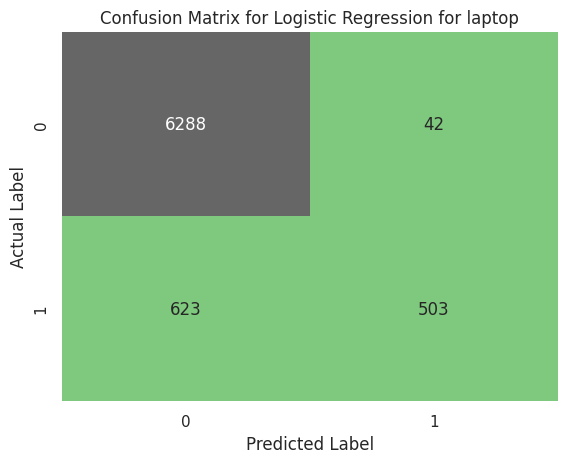

In [ ]:
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic Regression for laptop')
plt.show()

AUC: 0.699


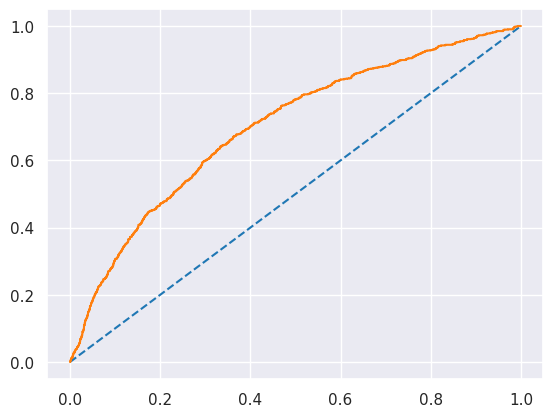

In [ ]:
# predict probabilities
probs = Logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,y_test)
print(Logistic_model_score)

0.844180225281602


In [ ]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,y_test)
print(Logistic_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.844180225281602
[[2698    4]
 [ 494    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2702
           1       0.00      0.00      0.00       494

    accuracy                           0.84      3196
   macro avg       0.42      0.50      0.46      3196
weighted avg       0.71      0.84      0.77      3196



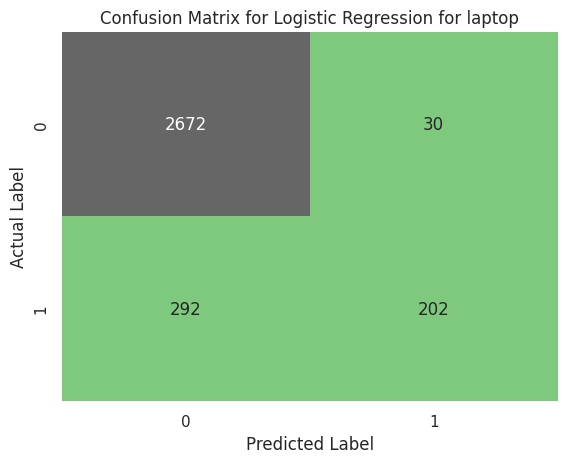

In [ ]:
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic Regression for laptop')
plt.show()

AUC: 0.692


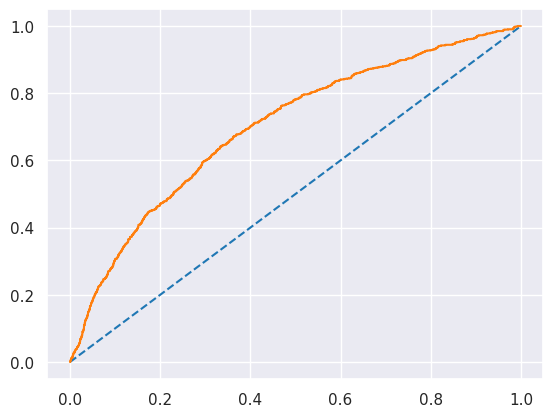

In [ ]:
probs_test = Logistic_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

# Logistic Regression for Mobile dataset

In [ ]:
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,y_train)
print(Logistic_model_score)

0.848175965665236


In [ ]:
y_train_prob=Logistic_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

0         1
0  0.720345  0.279655
1  0.931754  0.068246
2  0.857261  0.142739
3  0.908961  0.091039
4  0.950749  0.049251

In [ ]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,y_train)
print(Logistic_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.848175965665236
[[6316   14]
 [1118    8]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6330
           1       0.36      0.01      0.01      1126

    accuracy                           0.85      7456
   macro avg       0.61      0.50      0.47      7456
weighted avg       0.78      0.85      0.78      7456



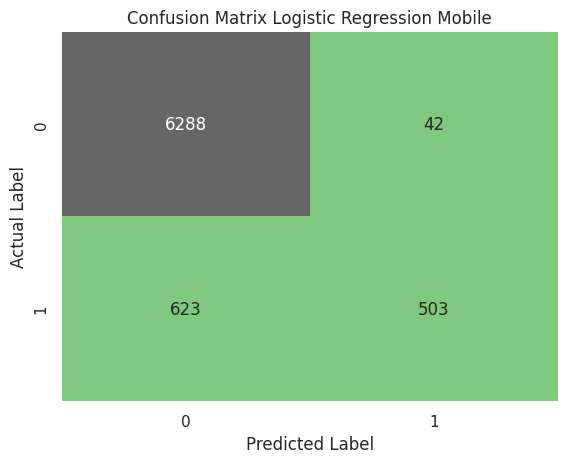

In [ ]:
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Logistic Regression Mobile')
plt.show()

AUC: 0.699


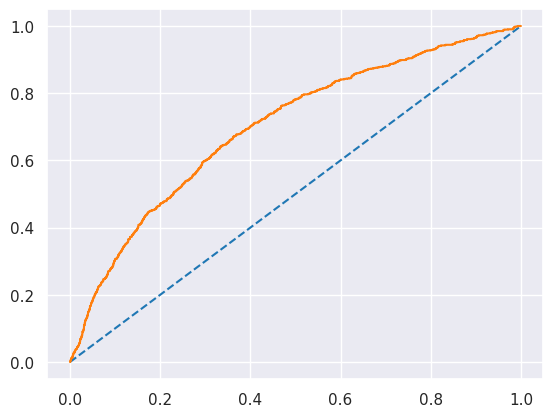

In [ ]:
# predict probabilities
probs = Logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,y_test)
print(Logistic_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.844180225281602
[[2698    4]
 [ 494    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2702
           1       0.00      0.00      0.00       494

    accuracy                           0.84      3196
   macro avg       0.42      0.50      0.46      3196
weighted avg       0.71      0.84      0.77      3196



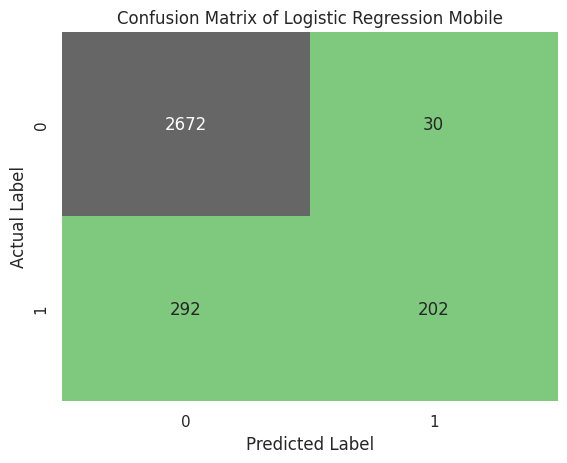

In [ ]:
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Logistic Regression Mobile')
plt.show()

AUC: 0.692


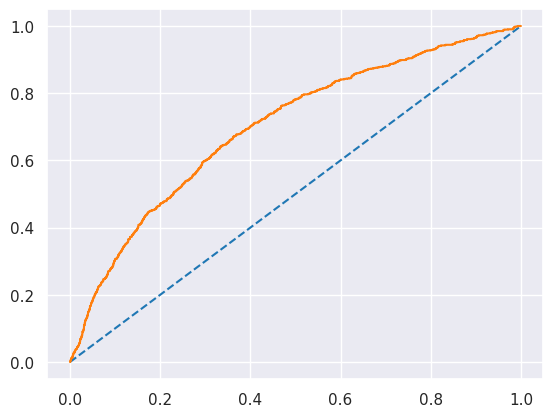

In [ ]:
probs_test = Logistic_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

# Modelling using Gridsearch for Logistic model for laptop dataset

In [ ]:
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.861748 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.861748 (0.004578) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.847540 (0.001136) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.848354 (0.002227) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.861623 (0.004421) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.847541 (0.001154) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.848010 (0.000609) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.861560 (0.004500) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.847822 (0.001227) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.847947 (0.000173) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.860997 (0.004108) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.848104 (0.002099) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.847916 (0.000057) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.858024 (0.003089) wit

In [ ]:
Logistic2_model = LogisticRegression(solver='newton-cg',penalty='l2',verbose=True,n_jobs=2, C=0.01)
Logistic2_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(C=0.01, n_jobs=2, solver='newton-cg', verbose=True)

In [ ]:
y_train_predict=Logistic2_model.predict(X_train)
Logistic2_model_score=Logistic2_model.score(X_train,y_train)
print(Logistic2_model_score)

0.8560890557939914


In [ ]:
y_test_predict=Logistic2_model.predict(X_test)
Logistic2_model_score=Logistic2_model.score(X_test,y_test)
print(Logistic2_model_score)

0.8541927409261577


In [ ]:
y_train_predict=Logistic2_model.predict(X_train)
Logistic2_model_score=Logistic2_model.score(X_train,y_train)
print(Logistic2_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8560890557939914
[[6311   19]
 [1054   72]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      6330
           1       0.79      0.06      0.12      1126

    accuracy                           0.86      7456
   macro avg       0.82      0.53      0.52      7456
weighted avg       0.85      0.86      0.80      7456



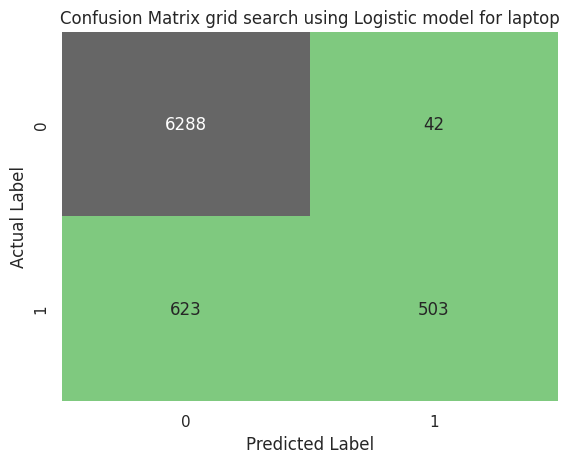

In [ ]:
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix grid search using Logistic model for laptop')
plt.show()

AUC: 0.768


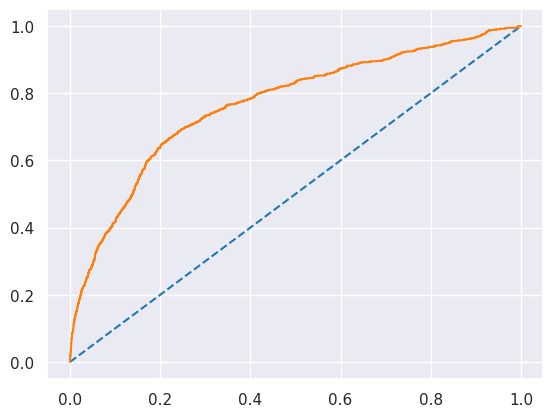

In [ ]:
# predict probabilities
probs = Logistic2_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
y_test_predict=Logistic2_model.predict(X_test)
Logistic2_model_score=Logistic2_model.score(X_test,y_test)
print(Logistic2_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8541927409261577
[[2690   12]
 [ 454   40]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2702
           1       0.77      0.08      0.15       494

    accuracy                           0.85      3196
   macro avg       0.81      0.54      0.53      3196
weighted avg       0.84      0.85      0.80      3196



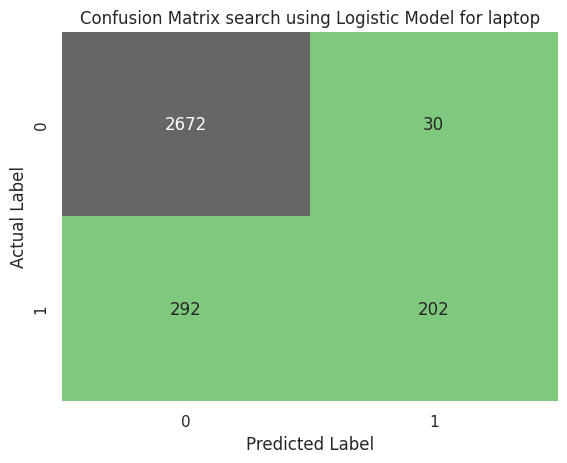

In [ ]:
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix search using Logistic Model for laptop')
plt.show()

AUC: 0.776


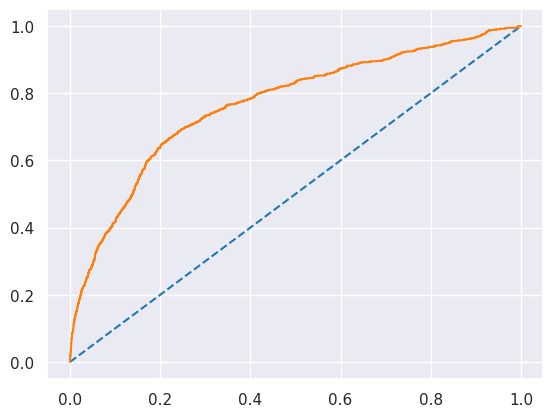

In [ ]:
probs_test = Logistic2_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

# Modelling using Gridsearch for Logistic model for Mobile dataset

In [ ]:
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.861748 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.861748 (0.004578) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.847540 (0.001136) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.848354 (0.002227) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.861623 (0.004421) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.847541 (0.001154) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.848010 (0.000609) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.861560 (0.004500) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.847822 (0.001227) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.847947 (0.000173) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.860997 (0.004108) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.848104 (0.002099) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.847916 (0.000057) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.858024 (0.003089) wit

In [ ]:
Logistic2_model = LogisticRegression(solver='newton-cg',penalty='l2',verbose=True,n_jobs=2, C=100)
Logistic2_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(C=100, n_jobs=2, solver='newton-cg', verbose=True)

In [ ]:
y_train_predict=Logistic2_model.predict(X_train)
Logistic2_model_score=Logistic2_model.score(X_train,y_train)
print(Logistic2_model_score)

0.8607832618025751


In [ ]:
y_train_predict=Logistic2_model.predict(X_train)
Logistic2_model_score=Logistic2_model.score(X_train,y_train)
print(Logistic2_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8607832618025751
[[6265   65]
 [ 973  153]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      6330
           1       0.70      0.14      0.23      1126

    accuracy                           0.86      7456
   macro avg       0.78      0.56      0.58      7456
weighted avg       0.84      0.86      0.82      7456



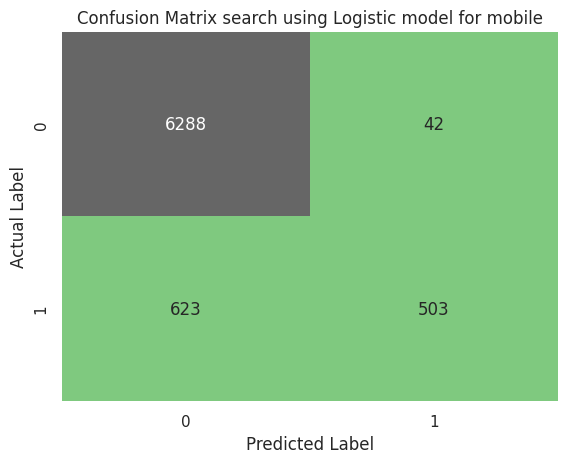

In [ ]:
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix search using Logistic model for mobile')
plt.show()

AUC: 0.769


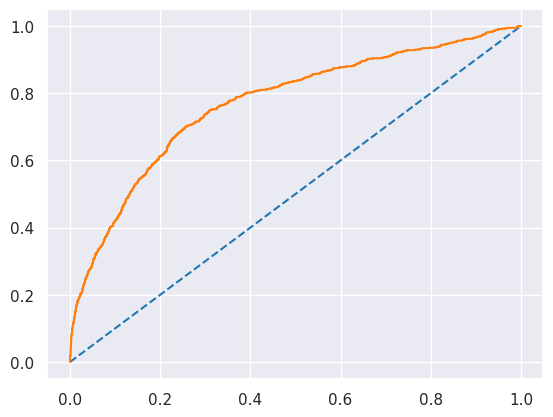

In [ ]:
# predict probabilities
probs = Logistic2_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
y_test_predict=Logistic2_model.predict(X_test)
Logistic2_model_score=Logistic2_model.score(X_test,y_test)
print(Logistic2_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8620150187734669
[[2676   26]
 [ 415   79]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      2702
           1       0.75      0.16      0.26       494

    accuracy                           0.86      3196
   macro avg       0.81      0.58      0.59      3196
weighted avg       0.85      0.86      0.82      3196



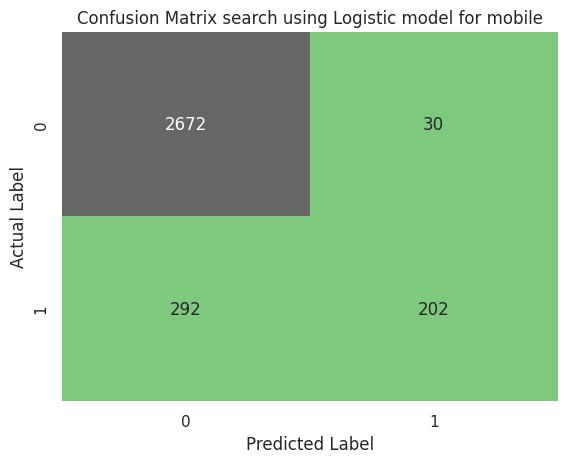

In [ ]:
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix search using Logistic model for mobile')
plt.show()

AUC: 0.781


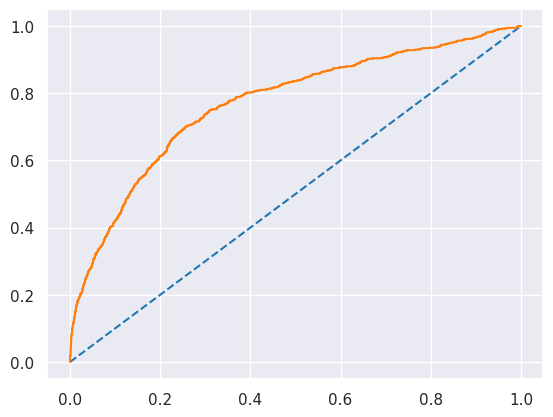

In [ ]:
probs_test = Logistic2_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

# We can clearly see that the above logistic base and tuned model have the same scores and hence both are a good fit.

# Discriminant Analysis LDA for Laptop dataset

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,y_train)
print(LDA_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8615879828326181
[[6247   83]
 [ 949  177]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      6330
           1       0.68      0.16      0.26      1126

    accuracy                           0.86      7456
   macro avg       0.77      0.57      0.59      7456
weighted avg       0.84      0.86      0.82      7456



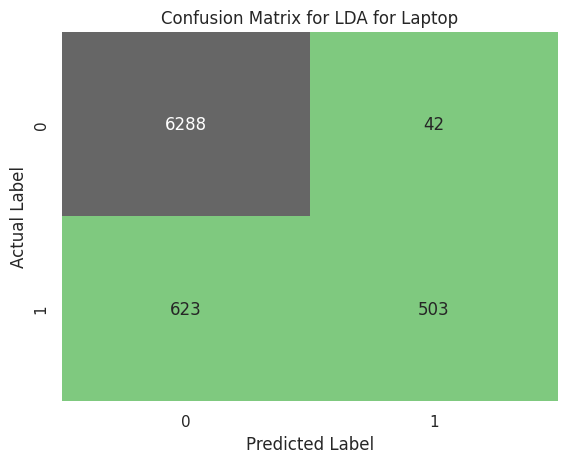

In [ ]:
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for LDA for Laptop')
plt.show()

In [ ]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,y_test)
print(LDA_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8620150187734669
[[2666   36]
 [ 405   89]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      2702
           1       0.71      0.18      0.29       494

    accuracy                           0.86      3196
   macro avg       0.79      0.58      0.61      3196
weighted avg       0.84      0.86      0.83      3196



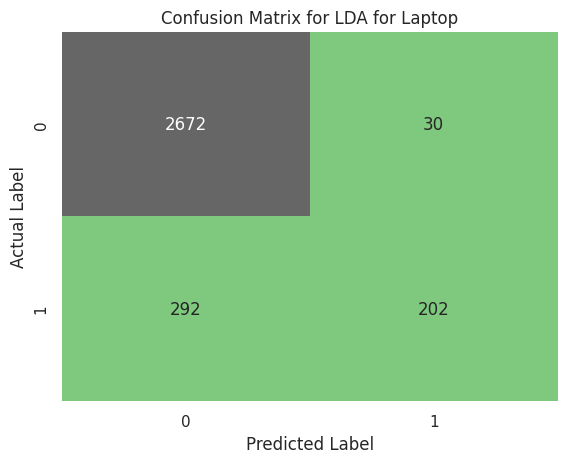

In [ ]:
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for LDA for Laptop')
plt.show()

# Discriminant Analysis LDA for Mobile dataset

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,y_train)
print(LDA_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8615879828326181
[[6247   83]
 [ 949  177]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      6330
           1       0.68      0.16      0.26      1126

    accuracy                           0.86      7456
   macro avg       0.77      0.57      0.59      7456
weighted avg       0.84      0.86      0.82      7456



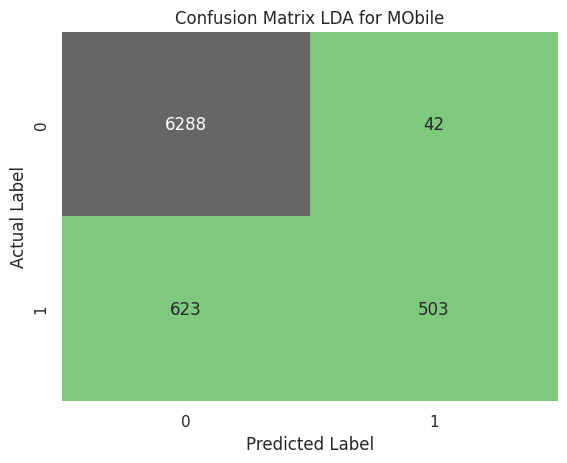

In [ ]:
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix LDA for MObile')
plt.show()

In [ ]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,y_test)
print(LDA_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8620150187734669
[[2666   36]
 [ 405   89]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      2702
           1       0.71      0.18      0.29       494

    accuracy                           0.86      3196
   macro avg       0.79      0.58      0.61      3196
weighted avg       0.84      0.86      0.83      3196



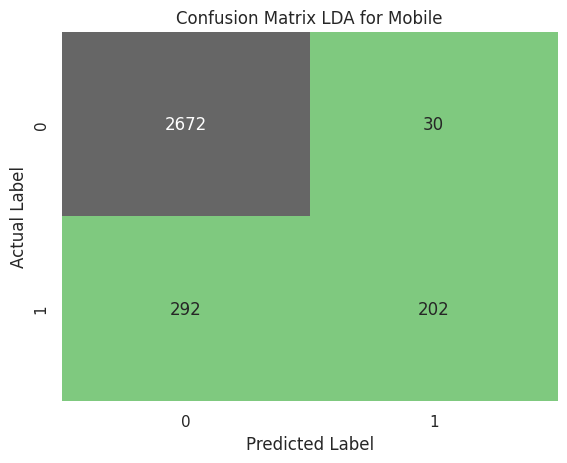

In [ ]:
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix LDA for Mobile')
plt.show()

# Ensemble techniques

# Bagging using hyperparameters for laptop dataset

In [ ]:
X = df1_laptop.drop('Taken_product', axis=1)
y = df1_laptop['Taken_product']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(base_estimator=rf, oob_score=True, random_state=1)

In [ ]:
params = {'n_estimators': [40, 42], 'base_estimator__max_leaf_nodes':[10, 15], 'base_estimator__max_depth':[4, 5, 6]}

In [ ]:
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
# Grid Search to determine best parameters
bc_grid = GridSearchCV(estimator=bc, param_grid=params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
bc_grid.fit(X_train, y_train)
best_params = bc_grid.best_params_
print(best_params)

{'base_estimator__max_depth': 6, 'base_estimator__max_leaf_nodes': 15, 'n_estimators': 40}


In [ ]:
rf = RandomForestClassifier(max_leaf_nodes=15, max_depth=6)
bc = BaggingClassifier(base_estimator=rf, n_estimators=42, random_state=1, oob_score=True)

In [ ]:
bc.fit(X_train, y_train)
final_preds = bc.predict(X_test)

In [ ]:
y_train_predict=bc.predict(X_train)
model_score=bc.score(X_train, y_train)
print(model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8748387096774194
[[594   0]
 [ 97  84]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       594
           1       1.00      0.46      0.63       181

    accuracy                           0.87       775
   macro avg       0.93      0.73      0.78       775
weighted avg       0.89      0.87      0.86       775



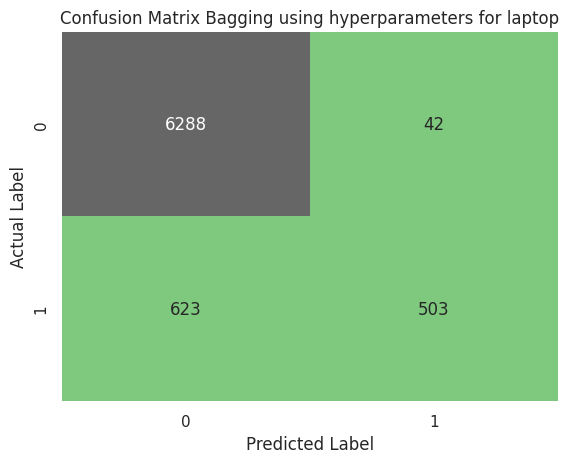

In [ ]:
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Bagging using hyperparameters for laptop')
plt.show()

In [ ]:
y_test_predict=bc.predict(X_test)
model_score=bc.score(X_test, y_test)
print(model_score)

print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8588588588588588
[[238   0]
 [ 47  48]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       238
           1       1.00      0.51      0.67        95

    accuracy                           0.86       333
   macro avg       0.92      0.75      0.79       333
weighted avg       0.88      0.86      0.84       333



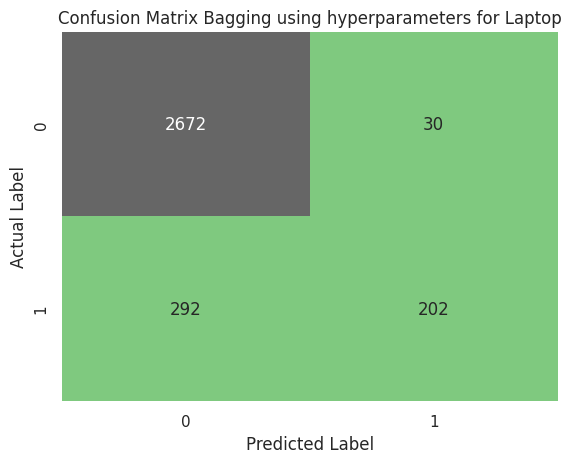

In [ ]:
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Bagging using hyperparameters for Laptop')
plt.show()

# Bagging using hyperparameters for mobile dataset

In [ ]:
X = df2_mobile.drop('Taken_product', axis=1)
y = df2_mobile['Taken_product']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(base_estimator=rf, oob_score=True, random_state=1)
params = {'n_estimators': [40, 42], 'base_estimator__max_leaf_nodes':[10, 15], 'base_estimator__max_depth':[4, 5, 6]}

In [ ]:
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
# Grid Search to determine best parameters
bc_grid = GridSearchCV(estimator=bc, param_grid=params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
bc_grid.fit(X_train, y_train)
best_params = bc_grid.best_params_
print(best_params)

{'base_estimator__max_depth': 6, 'base_estimator__max_leaf_nodes': 15, 'n_estimators': 40}


In [ ]:
rf = RandomForestClassifier(max_leaf_nodes=15, max_depth=6)
bc = BaggingClassifier(base_estimator=rf, n_estimators=40, random_state=1, oob_score=True)

In [ ]:
bc.fit(X_train, y_train)
final_preds = bc.predict(X_test)

In [ ]:
y_train_predict=bc.predict(X_train)
model_score=bc.score(X_train, y_train)
print(model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8677575107296137
[[6317   13]
 [ 973  153]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      6330
           1       0.92      0.14      0.24      1126

    accuracy                           0.87      7456
   macro avg       0.89      0.57      0.58      7456
weighted avg       0.87      0.87      0.82      7456



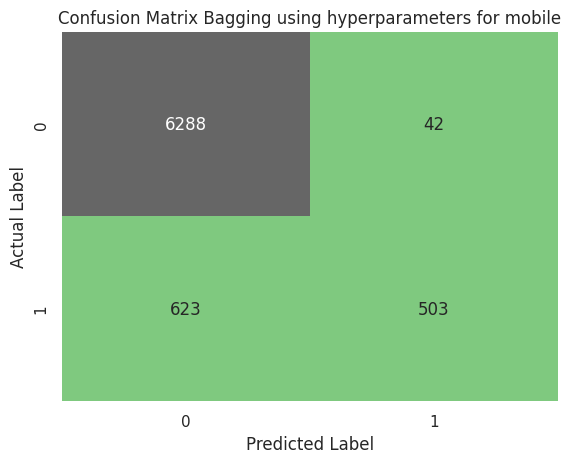

In [ ]:
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Bagging using hyperparameters for mobile')
plt.show()

In [ ]:
y_test_predict=bc.predict(X_test)
model_score=bc.score(X_test, y_test)
print(model_score)

print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.867334167709637
[[2695    7]
 [ 417   77]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2702
           1       0.92      0.16      0.27       494

    accuracy                           0.87      3196
   macro avg       0.89      0.58      0.60      3196
weighted avg       0.87      0.87      0.82      3196



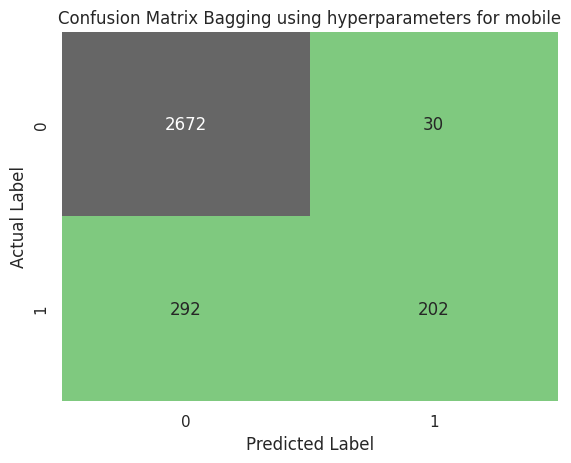

In [ ]:
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Bagging using hyperparameters for mobile')
plt.show()

# ADA Boosting Model for laptop

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
df1_laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 5881 to 11758
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Yearly_avg_view_on_travel_page                1108 non-null   float64
 1   total_likes_on_outstation_checkin_given       1108 non-null   float64
 2   yearly_avg_Outstation_checkins                1108 non-null   float64
 3   member_in_family                              1108 non-null   int64  
 4   Yearly_avg_comment_on_travel_page             1108 non-null   float64
 5   total_likes_on_outofstation_checkin_received  1108 non-null   float64
 6   week_since_last_outstation_checkin            1108 non-null   int64  
 7   following_company_page                        1108 non-null   float64
 8   travelling_network_rating                     1108 non-null   int64  
 9   Adult_flag                                    1108 non-null

In [ ]:
X = df1_laptop.drop('Taken_product', axis=1)
y = df1_laptop['Taken_product']
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
ADB_model=AdaBoostClassifier()
ADB_model.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9032258064516129
[[578  16]
 [ 59 122]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       594
           1       0.88      0.67      0.76       181

    accuracy                           0.90       775
   macro avg       0.90      0.82      0.85       775
weighted avg       0.90      0.90      0.90       775



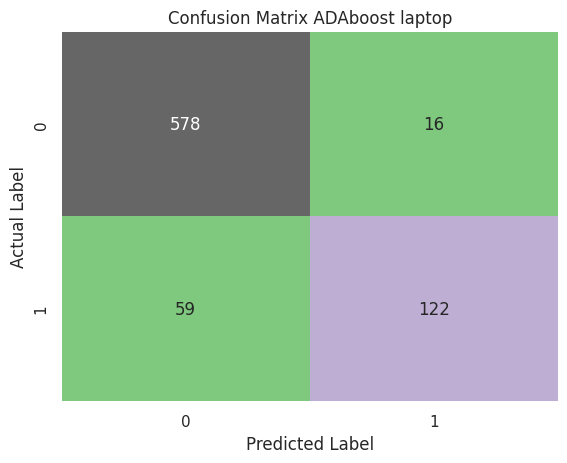

In [ ]:
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix ADAboost laptop')
plt.show()

In [ ]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, y_test)
print(ADB_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8768768768768769
[[226  12]
 [ 29  66]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       238
           1       0.85      0.69      0.76        95

    accuracy                           0.88       333
   macro avg       0.87      0.82      0.84       333
weighted avg       0.87      0.88      0.87       333



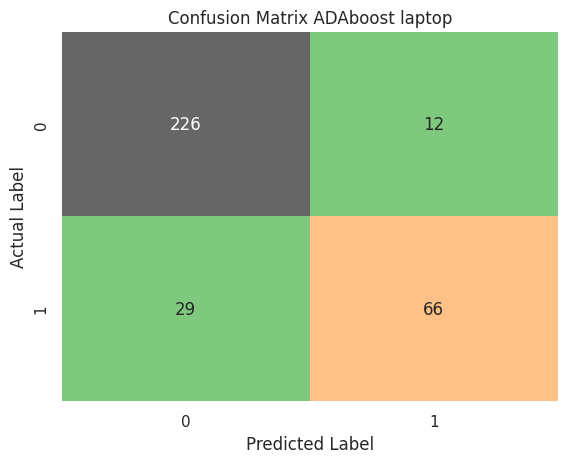

In [ ]:
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix ADAboost laptop')
plt.show()

# ADA Boosting Model for mobile

In [ ]:
X = df2_mobile.drop('Taken_product', axis=1)
y = df2_mobile['Taken_product']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=1)
ADB_model=AdaBoostClassifier()
ADB_model.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8754023605150214
[[6212  118]
 [ 811  315]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6330
           1       0.73      0.28      0.40      1126

    accuracy                           0.88      7456
   macro avg       0.81      0.63      0.67      7456
weighted avg       0.86      0.88      0.85      7456



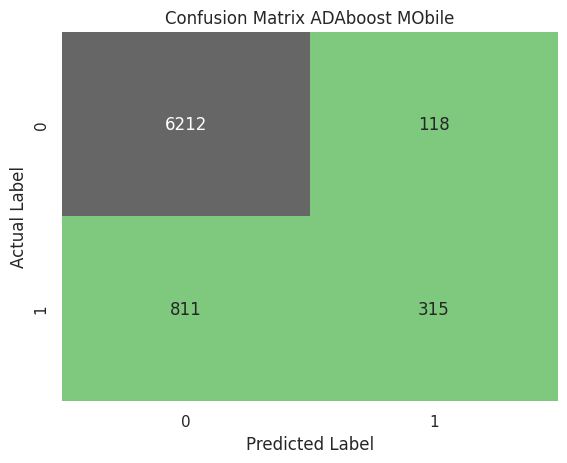

In [ ]:
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix ADAboost MObile')
plt.show()

In [ ]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, y_test)
print(ADB_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8745306633291614
[[2649   53]
 [ 348  146]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2702
           1       0.73      0.30      0.42       494

    accuracy                           0.87      3196
   macro avg       0.81      0.64      0.68      3196
weighted avg       0.86      0.87      0.85      3196



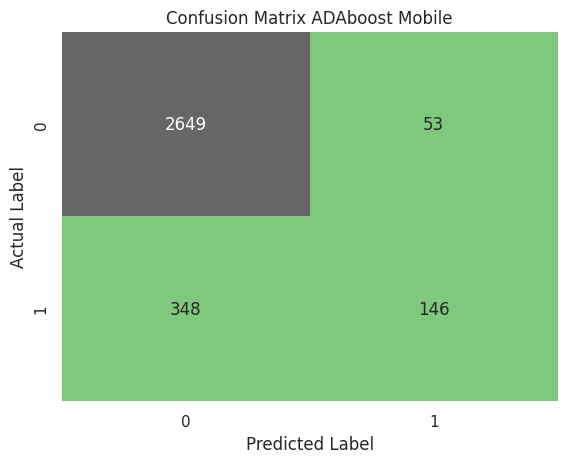

In [ ]:
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix ADAboost Mobile')
plt.show()

# Gradient Boosting for laptop

In [ ]:
X = df1_laptop.drop('Taken_product', axis=1)
y = df1_laptop['Taken_product']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=1)
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, y_train)
print(gbc_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9819354838709677
[[594   0]
 [ 14 167]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       594
           1       1.00      0.92      0.96       181

    accuracy                           0.98       775
   macro avg       0.99      0.96      0.97       775
weighted avg       0.98      0.98      0.98       775



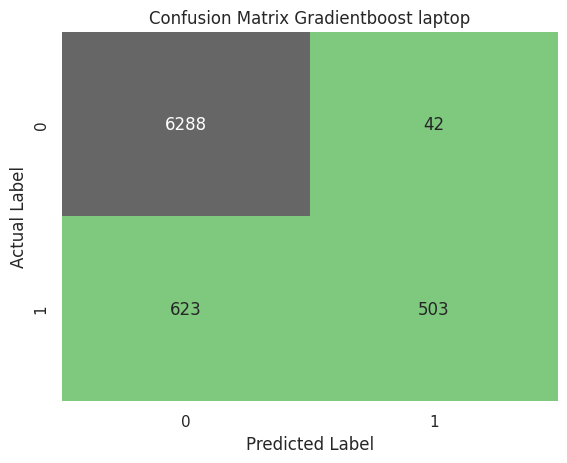

In [ ]:
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Gradientboost laptop')
plt.show()

In [ ]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, y_test)
print(gbc_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.954954954954955
[[235   3]
 [ 12  83]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       238
           1       0.97      0.87      0.92        95

    accuracy                           0.95       333
   macro avg       0.96      0.93      0.94       333
weighted avg       0.96      0.95      0.95       333



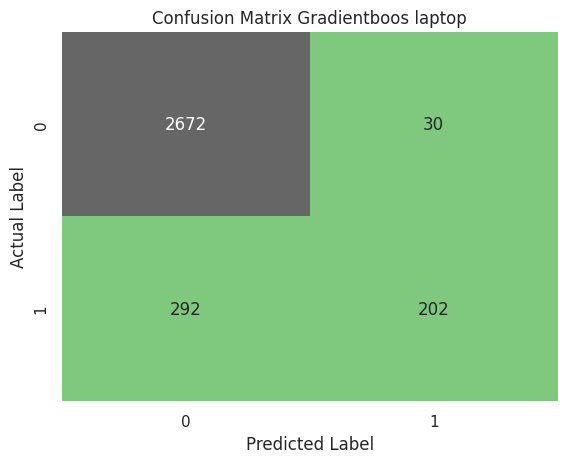

In [ ]:
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Gradientboos laptop')
plt.show()

# Gradient Boosting for Mobile


In [ ]:
X = df2_mobile.drop('Taken_product', axis=1)
y = df2_mobile['Taken_product']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
gbc_model=GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, y_train)
print(gbc_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9108100858369099
[[6288   42]
 [ 623  503]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6330
           1       0.92      0.45      0.60      1126

    accuracy                           0.91      7456
   macro avg       0.92      0.72      0.78      7456
weighted avg       0.91      0.91      0.90      7456



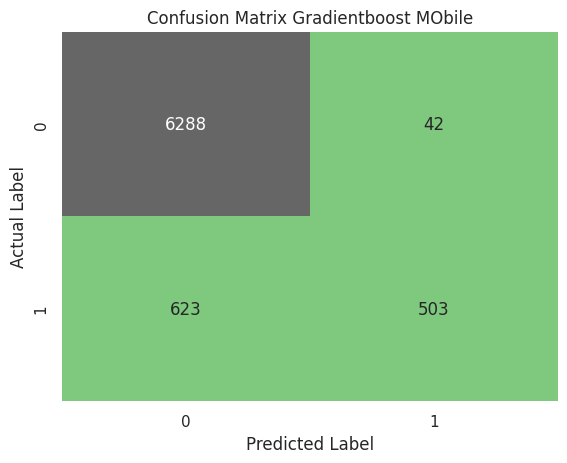

In [ ]:
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Gradientboost MObile')
plt.show()

In [ ]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, y_test)
print(gbc_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8992490613266583
[[2672   30]
 [ 292  202]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2702
           1       0.87      0.41      0.56       494

    accuracy                           0.90      3196
   macro avg       0.89      0.70      0.75      3196
weighted avg       0.90      0.90      0.88      3196



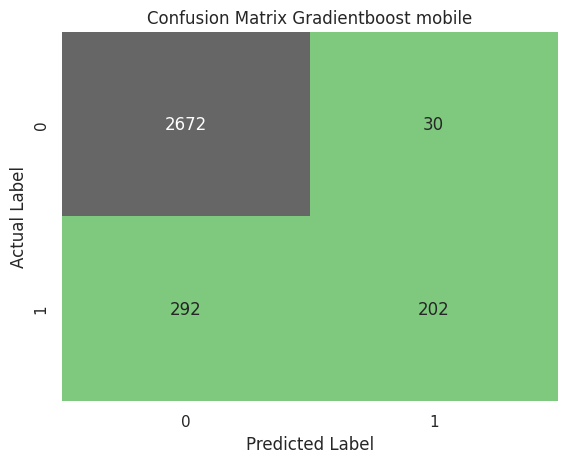

In [ ]:
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Gradientboost mobile')
plt.show()